In [ ]:
''' 
This capsule is provided to reproduce the results of the manuscript entitled
"Precision AI Models for Distinguishing Between Acoustic Neuroma-Containing and 
Non-Tumor Sensorineural Hearing Loss Cases by Using Standardized Audiograms"

Datasets:
data/datasets/master directory contains the following original audiogram datasets:
    1. original_general_hearingloss_100cases
    2. frame_resized_general_hearingloss_100cases
    3. photoimage_general_hearingloss_100cases

    4. original_tumor89cases

    5. original_nontumor_SNHL77cases
    6. frame_resized_additional_nontumorSNHL_100cases

data/datasets/fig2, fig3, table4_data: training, validation, and/or test datasets
data/datasets/YOLOresults: the results detected by YOLOv5x for respective Figures

Models:
data/models/stansardization
    1. YOLOv5x audiogram standardization model: aagraphmodel3_ntnshladded_aa6_best_20240315.pt
data/models/analysis
    The file name includes the type of model (e.g., EfficientNetV2S, MLP (Multilayer Perceptron), xgb (XGBoost))
    Scaler (tumorMLPscaler.gz, scaler_fig5d.pkl)

Utilities
General: code/utilities/general
    1. drawingfullgraph.py: to redraw a standardized audiogram
    2. plotconfusionmatrix.py: to depict a confusion matrix and calculate model performance
df_preps: code/utilities/df_preps
    to prepare a DataFrame (df) from YOLOv5x detection results in respective Figures

YOLOv5
    YOLOv5 is included in this capsule : License is the same as the YOLOv5 repository.
    GNU Affero General Public License v3.0

Others:
    The license used for each model is the same as the original license.

'''

In [1]:
#coding:utf-8
import cv2, os
import glob
import numpy as np
import pandas as pd
import math
import copy
from itertools import chain
import time
import subprocess
from PIL import Image
import matplotlib.pyplot as plt




In [ ]:
''' 
Fig.2: To standardize audiograms (original .jpg and photo .jpg images)

Redraw a standardized audiogram from each original image


'''

In [2]:
print(os.getcwd())

/Users/tesutoyoukanrisha/studioーGitHub/CodeOceanAudiogram1/code


In [3]:
# To annotate each threshold sign in an audiogram by standardization YOLOv5x model
start = time.time()
print(start)
%cd yolov5
FILE_PATH = "../../data/datasets/fig2/testdata91-100/*.JPG"
SAVE_DIRECTORY_PATH = '../../results/fig2/yolodetect_save_dir'
proc = subprocess.Popen(['python','detect.py', '--weights', '../../data/models/standardization/aagraphmodel3_ntnshladded_aa6_best_20240315.pt', '--SAVE_PATH', SAVE_DIRECTORY_PATH ,'--img', '416', '--conf', '0.30', '--source', FILE_PATH, '--save-txt'])
proc.wait()

#end
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")
%cd ..


1734271803.010325
/Users/tesutoyoukanrisha/studioーGitHub/CodeOceanAudiogram1/code/yolov5


detect: weights=['../../data/models/standardization/aagraphmodel3_ntnshladded_aa6_best_20240315.pt'], source=../../data/datasets/fig2/testdata91-100/*.JPG, SAVE_PATH=../../results/fig2/yolodetect_save_dir, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-12-11 Python-3.10.6 torch-1.13.1 CPU

Fusing layers... 
YOLOv5x summary: 322 layers, 86213788 parameters, 0 gradients
image 1/18 /Users/tesutoyoukanrisha/studioーGitHub/CodeOceanAudiogram1/data/datasets/fig2/testdata91-100/ICOPY091.JPG: 256x416 1 aa0, 1 aa1, 8 aa2s, 6 aa3s, 9 aa4s, 5 aa5s, 99.3ms
image 2/18 /Users/tesutoyoukanrisha/studioーGitHub/CodeOceanAudiogram1/data/datasets/fig2/t

elapsed_time:7.05876088142395[sec]
/Users/tesutoyoukanrisha/studioーGitHub/CodeOceanAudiogram1/code


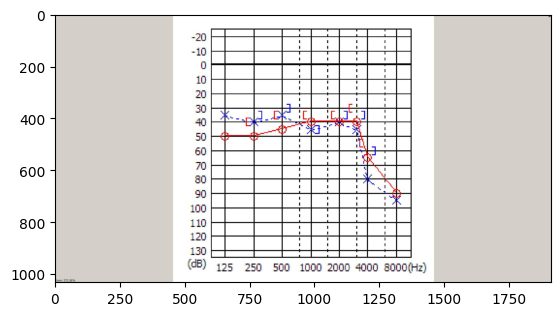

In [4]:
#original .jpg audiogram image
im = Image.open("../data/datasets/fig2/testdata91-100/ICOPY093.JPG")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

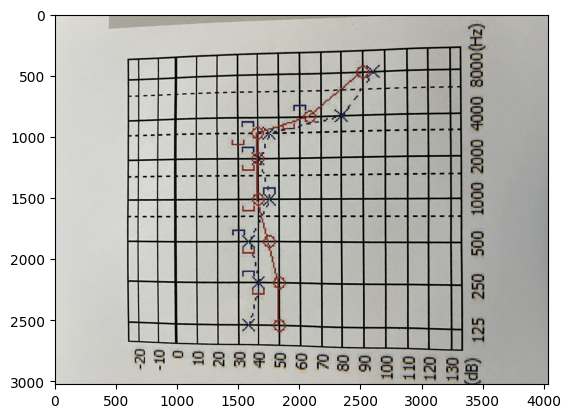

In [5]:
#photo .jpg audiogram image
im = Image.open("../data/datasets/fig2/testdata91-100/ICOPY093_photo.JPG")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

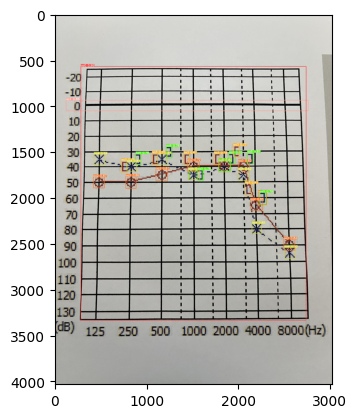

In [6]:
#annotated YOLO detection image
im = Image.open("../results/fig2/yolodetect_save_dir/ICOPY093_photo.JPG")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

In [7]:
# To redraw a full audiogram
from utilities.general.drawingfullgraph import draw_RL_full_linedotgraph

YOLOIMG_FILE_PATH = '../results/fig2/yolodetect_save_dir/ICOPY093_photo.JPG'
FULLGRAPH_SAVE_DIR= '../results/fig2/yolodetect_save_dir/fullgraphdata'

draw_RL_full_linedotgraph(YOLOIMG_FILE_PATH, FULLGRAPH_SAVE_DIR)

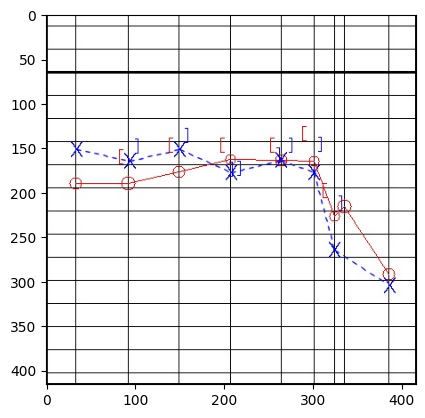

In [8]:
#to show a redrawn audiogram
im = Image.open("../results/fig2/yolodetect_save_dir/fullgraphdata/ICOPY093_photo.JPG")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

In [9]:
'''  
Fig. 3C: Standardized full audiograms read by EfficientNetV2S model
data/datasets/fig3/fig3c_data contains the traininig, validation, and test datasets (standardized audiograms)

Note that this EfficientNetV2S model gives different results each time of runnning.
'''


'  \nFig. 3C: Standardized full audiograms read by EfficientNetV2S model\ndata/datasets/fig3/fig3c_data contains the traininig, validation, and test datasets (standardized audiograms)\n\nNote that this EfficientNetV2S model gives different results each time of runnning.\n'

In [10]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
from pathlib import Path
import seaborn as sns
import timm

/Users/tesutoyoukanrisha/python_envs/codeocean_audiogram1_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# train_dataset_dir = Path('../data/datasets/fig3/fig3c_data/train')
# val_dataset_dir = Path('../data/datasets/fig3/fig3c_data/val')
test_dataset_dir = Path('../data/datasets/fig3/fig3c_data/test') 

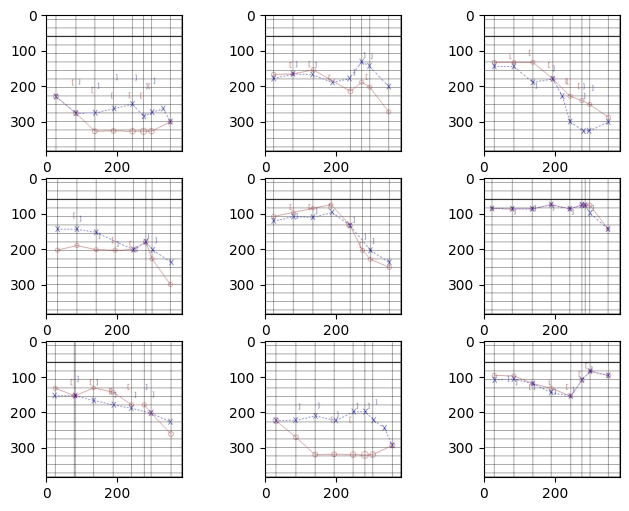

In [12]:
#To show some of the test standardized audiograms
files = glob.glob('../data/datasets/fig3/fig3c_data/*/*/*.jpg')
random_idx = np.random.randint(1, len(files), size=9)
fig, axes = plt.subplots(3, 3, figsize=(8, 6))

for idx, ax in enumerate(axes.ravel()):
    img = Image.open(files[idx])
    ax.imshow(img)

In [13]:
test_transforms = transforms.Compose(
    [
        transforms.Resize((384, 384)),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

In [14]:
test_data = datasets.ImageFolder(test_dataset_dir, test_transforms)
test_loader = DataLoader(dataset = test_data, batch_size=4, shuffle=True)

In [15]:
!pip uninstall timm -y
!pip install timm
!python -c "import timm; print(timm.__version__)"

Found existing installation: timm 1.0.12
Uninstalling timm-1.0.12:
  Successfully uninstalled timm-1.0.12
Looking in indexes: https://pypi.python.org/simple/
  Using cached timm-1.0.12-py3-none-any.whl.metadata (51 kB)
Using cached timm-1.0.12-py3-none-any.whl (2.4 MB)
1.0.12


In [16]:
def torch_load(file_name):
    with open(file_name, 'rb') as f:
        return torch.load(f, torch.device('cpu')) 

In [ ]:
model = torch_load('../data/models/anlaysis/redrawfullgraph_EfficientNetV2Smodel2_weight.pth')

In [18]:
device = torch.device('cpu')
test_cor = []
test_pred = []
# image_data = []
for data, label in test_loader:
  # image_data.append(data)
  data = data.to(device)
  label = label.to(device)

  test_output = model(data)
  test_predict = test_output.argmax(dim=1)
  test_pred.append(test_predict)
  test_cor.append(label)

In [19]:
test_pred_list =[]
test_cor_list = []
for each_batch in test_pred:
  for item in each_batch:
    item=item.tolist()
    test_pred_list.append(item)
print(test_pred_list)

[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]


In [20]:
for each_batch in test_cor:
  for item in each_batch:
    item=item.tolist()
    test_cor_list.append(item)
print(test_cor_list)

[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]


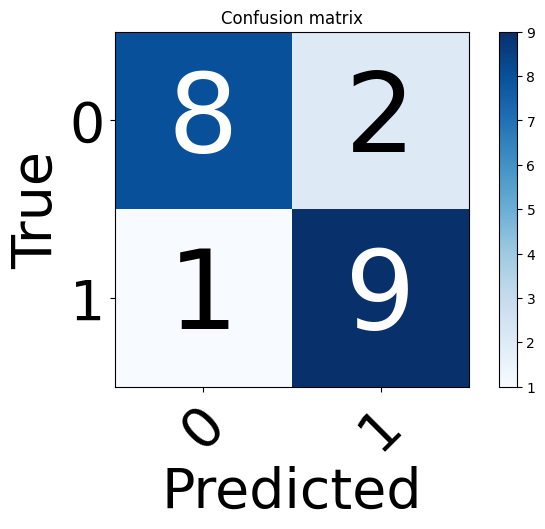

Recall (Sensitivity) =  0.90
Specificity =     0.80
Accuracy =     0.85
Precision(PPV) =     0.82
NPV =     0.89


In [21]:
from sklearn.metrics import confusion_matrix
from utilities.general.plotconfusionmatrix import plot_confusion_matrix
cm = confusion_matrix(test_cor_list, test_pred_list)
plot_confusion_matrix(cm, ['0', '1'], )

In [22]:
''' 
Fig.3F: Tumor detection MLP model with air-conduction thresholds

'''

' \nFig.3F: Tumor detection MLP model with air-conduction thresholds\n\n'

In [23]:
#To prepare test data
from utilities.df_preps.fig3f_ac_df_prep import prepare1_RL_df_point
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig3f/yolodetect_ICOPYcont10_save_dir/ICOPYcont10"
df_icopy10 = prepare1_RL_df_point(YOLOIMG_FILE_DIR)
df_icopy10=df_icopy10.drop('initial_cont', axis=0)
df_icopy10

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,label
ICOPY092_0_0,253.0,299.0,352.0,354.0,355.0,355.0,352.0,327.0,253.0,299.0,299.0,286.0,275.0,307.0,295.0,322.0,0.0
ICOPY082_0_0,180.0,178.0,167.0,201.0,228.0,209.0,230.0,296.0,191.0,180.0,182.0,205.0,181.0,147.0,165.0,219.0,0.0
ICOPY032_0_0,144.0,144.0,144.0,192.0,249.0,263.0,276.0,310.0,157.0,157.0,203.0,195.0,328.0,354.0,350.0,327.0,0.0
ICOPY022_0_0,214.0,206.0,217.0,219.0,219.0,196.0,252.0,322.0,156.0,156.0,164.0,191.0,219.0,196.0,221.0,254.0,0.0
ICOPY042_0_0,115.0,104.0,92.0,86.0,159.0,226.0,250.0,272.0,129.0,118.0,120.0,106.0,153.0,197.0,224.0,256.0,0.0
ICOPY052_0_0,93.0,94.0,94.0,81.0,92.0,82.0,88.0,154.0,93.0,94.0,94.0,81.0,92.0,82.0,110.0,155.0,0.0
ICOPY002_0_0,146.0,166.0,143.0,157.0,195.0,198.0,227.0,279.0,167.0,167.0,182.0,195.0,206.0,215.0,223.0,246.0,0.0
ICOPY012_0_0,244.0,290.0,340.0,346.0,346.0,347.0,347.0,324.0,242.0,242.0,230.0,240.0,217.0,216.0,237.0,294.0,0.0
ICOPY072_0_0,105.0,105.0,128.0,144.0,165.0,114.0,92.0,104.0,118.0,116.0,129.0,157.0,165.0,114.0,92.0,104.0,0.0
ICOPY062_0_0,183.0,181.0,169.0,200.0,227.0,192.0,194.0,269.0,218.0,207.0,209.0,232.0,208.0,187.0,182.0,256.0,0.0


In [24]:
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig3f/yolodetect_PTAcont10_save_dir/PTAcont10"
df_pta10 = prepare1_RL_df_point(YOLOIMG_FILE_DIR)
df_pta10=df_pta10.drop('initial_cont', axis=0)
df_pta10


,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,label
PTA62_1_0,192.0,202.0,228.0,290.0,241.0,242.0,283.0,303.0,99.0,90.0,90.0,116.0,143.0,156.0,169.0,202.0,1.0
PTA03_0_1,93.0,81.0,93.0,118.0,107.0,113.0,130.0,121.0,131.0,120.0,94.0,131.0,183.0,198.0,244.0,232.0,1.0
PTA72_0_1,171.0,171.0,171.0,196.0,180.0,164.0,176.0,186.0,210.0,234.0,234.0,248.0,234.0,230.0,221.0,221.0,1.0
PTA02_1_0,191.0,191.0,190.0,192.0,205.0,221.0,239.0,300.0,139.0,129.0,90.0,79.0,122.0,159.0,192.0,262.0,1.0
PTA12_1_0,93.0,93.0,105.0,108.0,165.0,136.0,190.0,169.0,93.0,92.0,82.0,82.0,81.0,71.0,81.0,81.0,1.0
PTA22_0_1,131.0,131.0,131.0,94.0,105.0,102.0,121.0,125.0,191.0,191.0,168.0,191.0,212.0,298.0,319.0,328.0,1.0
PTA32_0_1,109.0,108.0,95.0,95.0,93.0,99.0,143.0,166.0,174.0,209.0,247.0,292.0,261.0,237.0,252.0,271.0,1.0
PTA52_1_0,248.0,294.0,345.0,347.0,347.0,346.0,343.0,322.0,103.0,103.0,127.0,141.0,157.0,191.0,187.0,237.0,1.0
PTA82_1_0,193.0,204.0,204.0,231.0,261.0,246.0,260.0,274.0,115.0,115.0,128.0,116.0,146.0,164.0,171.0,186.0,1.0
PTA42_0_1,91.0,92.0,129.0,142.0,157.0,167.0,168.0,180.0,129.0,130.0,153.0,167.0,191.0,203.0,208.0,223.0,1.0


In [25]:
test_df= pd.concat([df_pta10, df_icopy10])
test_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,label
PTA62_1_0,192.0,202.0,228.0,290.0,241.0,242.0,283.0,303.0,99.0,90.0,90.0,116.0,143.0,156.0,169.0,202.0,1.0
PTA03_0_1,93.0,81.0,93.0,118.0,107.0,113.0,130.0,121.0,131.0,120.0,94.0,131.0,183.0,198.0,244.0,232.0,1.0
PTA72_0_1,171.0,171.0,171.0,196.0,180.0,164.0,176.0,186.0,210.0,234.0,234.0,248.0,234.0,230.0,221.0,221.0,1.0
PTA02_1_0,191.0,191.0,190.0,192.0,205.0,221.0,239.0,300.0,139.0,129.0,90.0,79.0,122.0,159.0,192.0,262.0,1.0
PTA12_1_0,93.0,93.0,105.0,108.0,165.0,136.0,190.0,169.0,93.0,92.0,82.0,82.0,81.0,71.0,81.0,81.0,1.0
PTA22_0_1,131.0,131.0,131.0,94.0,105.0,102.0,121.0,125.0,191.0,191.0,168.0,191.0,212.0,298.0,319.0,328.0,1.0
PTA32_0_1,109.0,108.0,95.0,95.0,93.0,99.0,143.0,166.0,174.0,209.0,247.0,292.0,261.0,237.0,252.0,271.0,1.0
PTA52_1_0,248.0,294.0,345.0,347.0,347.0,346.0,343.0,322.0,103.0,103.0,127.0,141.0,157.0,191.0,187.0,237.0,1.0
PTA82_1_0,193.0,204.0,204.0,231.0,261.0,246.0,260.0,274.0,115.0,115.0,128.0,116.0,146.0,164.0,171.0,186.0,1.0
PTA42_0_1,91.0,92.0,129.0,142.0,157.0,167.0,168.0,180.0,129.0,130.0,153.0,167.0,191.0,203.0,208.0,223.0,1.0


In [26]:
X_test = test_df.loc[:, :'lp7']
y_test = test_df.loc[:, 'label'].astype(int).values

In [27]:
from sklearn.preprocessing import StandardScaler
import joblib 
# define standard scaler
scaler = StandardScaler()
scaler = joblib.load('../data/models/anlaysis/tumorMLPscaler.gz')

In [28]:
# transform data
X_test = scaler.transform(X_test)
X_test

array([[ 8.02199196e-01,  7.94747144e-01,  1.10467451e+00,
         1.99149210e+00,  1.05692574e+00,  9.97464664e-01,
         1.40804522e+00,  1.39872182e+00, -1.01647359e+00,
        -1.08912672e+00, -1.02309937e+00, -6.54733582e-01,
        -4.71145020e-01, -3.20361400e-01, -2.82723119e-01,
        -9.83204472e-02],
       [-1.18647983e+00, -1.27528016e+00, -9.50544360e-01,
        -5.85576518e-01, -9.35842581e-01, -8.58606277e-01,
        -7.86916209e-01, -1.22536392e+00, -3.69528883e-01,
        -5.67457144e-01, -9.61523948e-01, -4.31348706e-01,
         1.12284241e-01,  2.67519990e-01,  7.76235373e-01,
         3.30299215e-01],
       [ 3.80358190e-01,  2.64409571e-01,  2.36915435e-01,
         5.83094135e-01,  1.49770012e-01, -1.24810788e-01,
        -1.26993166e-01, -2.88190442e-01,  1.22761586e+00,
         1.41488725e+00,  1.19361594e+00,  1.31105333e+00,
         8.56156548e-01,  7.15429620e-01,  4.51488102e-01,
         1.73138672e-01],
       [ 7.82111529e-01,  6.06562844e

In [29]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 2)#number of classes: original:3 for iris classification

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [30]:
model = Model(X_test.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=16, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=2, bias=True)
)

In [31]:
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [32]:
model.load_state_dict(torch.load('../data/models/anlaysis/tumorMLPbest_model1.pt'))

<All keys matched successfully>

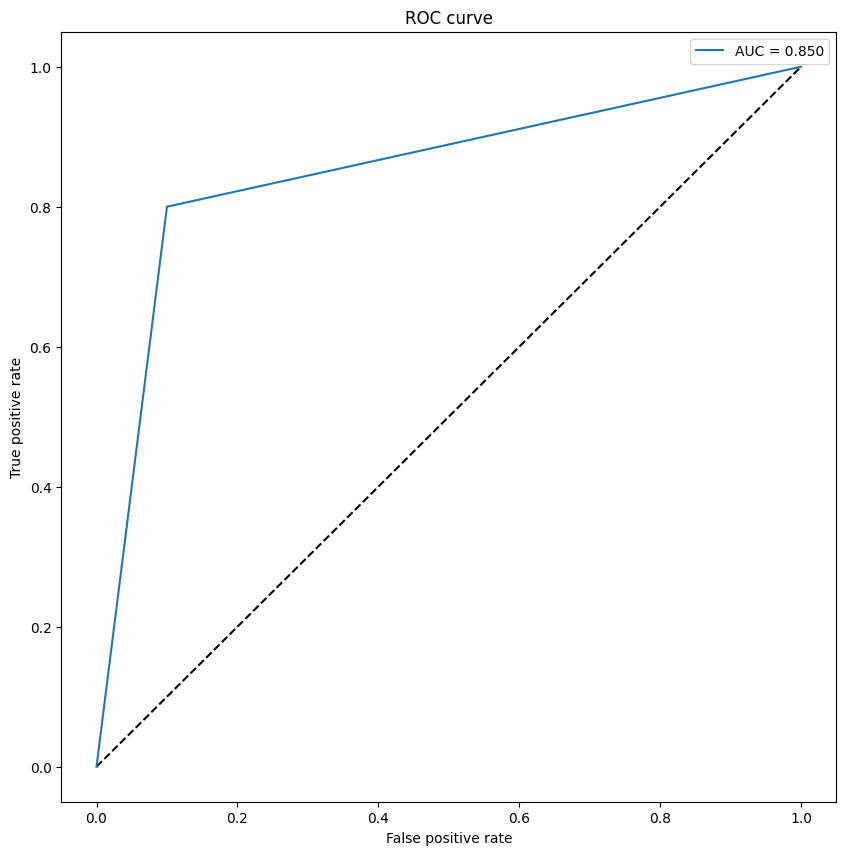

In [33]:
# ROC

from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

# enc = OneHotEncoder()
# Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_conv = torch.argmax(y_pred, dim=1)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred_conv.ravel())
    # fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

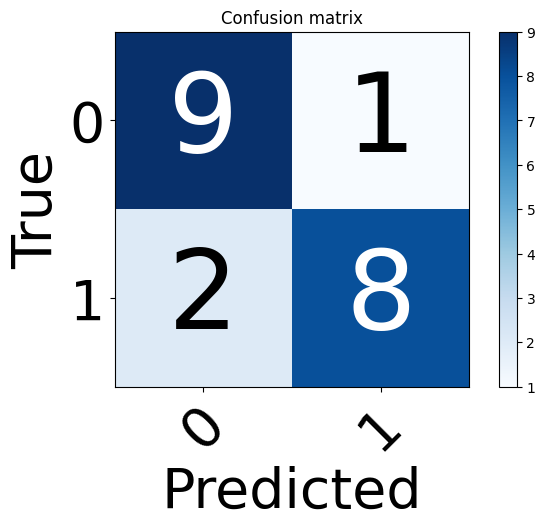

Recall (Sensitivity) =  0.80
Specificity =     0.90
Accuracy =     0.85
Precision(PPV) =     0.89
NPV =     0.82


In [34]:
cm = confusion_matrix(y_test, y_pred_conv)
plot_confusion_matrix(cm, ['0', '1'], )

In [35]:
''' 
Fig. 3I: EfficientNetV2S model using audiograms with the absolute difference painted black

data/datasets/fig3/fig3i_data contains the traininig, validation, and test datasets 
 (audiograms with the absolute right-left air-conduction difference painted black)

 Note that this EfficientNetV2S model gives different results each time of runnning.
'''

' \nFig. 3I: EfficientNetV2S model using audiograms with the absolute difference painted black\n\ndata/datasets/fig3/fig3i_data contains the traininig, validation, and test datasets \n (audiograms with the absolute right-left air-conduction difference painted black)\n\n Note that this EfficientNetV2S model gives different results each time of runnning.\n'

In [36]:
# train_dataset_dir = Path('../data/datasets/fig3/fig3i_data/data/train')
# val_dataset_dir = Path('../data/datasets/fig3/fig3i_data/data/val')
test_dataset_dir = Path('../data/datasets/fig3/fig3i_data/data/test') 

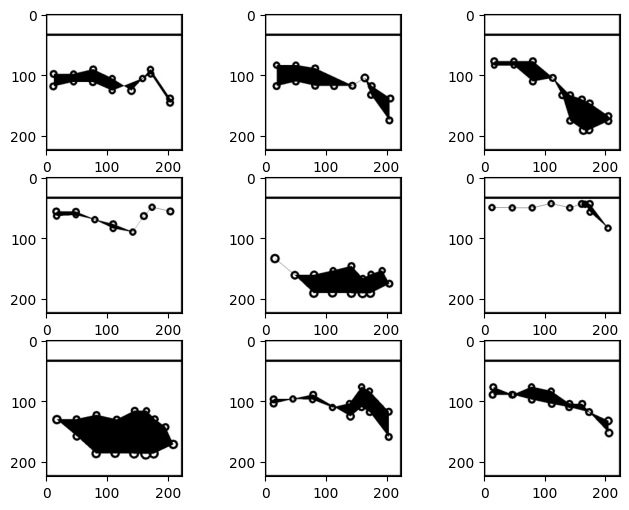

In [37]:
#To show some of the test standardized audiograms (corresponding to Figs. 3G and 3H
files = glob.glob('../data/datasets/fig3/fig3i_data/*/*/*/*.jpg')
random_idx = np.random.randint(1, len(files), size=9)
fig, axes = plt.subplots(3, 3, figsize=(8, 6))

for idx, ax in enumerate(axes.ravel()):
    img = Image.open(files[idx])
    ax.imshow(img)

In [38]:
test_data = datasets.ImageFolder(test_dataset_dir, test_transforms)
test_loader = DataLoader(dataset = test_data, batch_size=4, shuffle=True)

In [39]:
def torch_load(file_name):
    with open(file_name, 'rb') as f:
        return torch.load(f, torch.device('cpu')) 

In [40]:
model = torch_load('../data/models/anlaysis/absareadiff_EfficientNetV2Smodel_weight.pth')

In [41]:
device = torch.device('cpu')
test_cor = []
test_pred = []
# image_data = []
for data, label in test_loader:
  # image_data.append(data)
  data = data.to(device)
  label = label.to(device)

  test_output = model(data)
  test_predict = test_output.argmax(dim=1)
  test_pred.append(test_predict)
  test_cor.append(label)

In [42]:
test_pred_list =[]
test_cor_list = []
for each_batch in test_pred:
  for item in each_batch:
    item=item.tolist()
    test_pred_list.append(item)
print(test_pred_list)

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]


In [43]:
for each_batch in test_cor:
  for item in each_batch:
    item=item.tolist()
    test_cor_list.append(item)
print(test_cor_list)

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


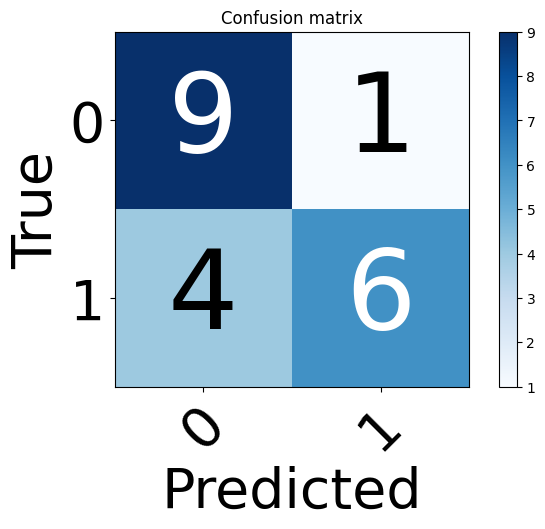

Recall (Sensitivity) =  0.60
Specificity =     0.90
Accuracy =     0.75
Precision(PPV) =     0.86
NPV =     0.69


In [44]:
from sklearn.metrics import confusion_matrix
from utilities.general.plotconfusionmatrix import plot_confusion_matrix
cm = confusion_matrix(test_cor_list, test_pred_list)
plot_confusion_matrix(cm, ['0', '1'], )

In [45]:
''' 
Figs 3J-K: XGBoost model using a df with the absolute right-left air-conduction differences
'''
'''
Prepare tumor detection data
air conduction LR differential :d0, d1, d2, d3, d4, d5, d6, d7 (for 8 points)
labels: non-tumor(0),tumorLand/orR(1)

measurement x points
total 165 (416 pixels)
d0:14 (35 pix)
d1:36 (90)
d2:58 (146)
d3:82 (207)
d4:106 (267)
d5:120 (303)
d6:130 (328)
d7:150 (378)



'''

'\nPrepare tumor detection data\nair conduction LR differential :d0, d1, d2, d3, d4, d5, d6, d7 (for 8 points)\nlabels: non-tumor(0),tumorLand/orR(1)\n\nmeasurement x points\ntotal 165 (416 pixels)\nd0:14 (35 pix)\nd1:36 (90)\nd2:58 (146)\nd3:82 (207)\nd4:106 (267)\nd5:120 (303)\nd6:130 (328)\nd7:150 (378)\n\n\n\n'

In [46]:
from utilities.df_preps.fig3j_ad_absdif_df_prep import prepare_RL_df_differential
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig3j/yolodetect_PTAcont10_save_dir/PTAcont10"
df_PTAcont10 = prepare_RL_df_differential(YOLOIMG_FILE_DIR)
df_PTAcont10=df_PTAcont10.drop('initial_cont', axis=0)#to remove level0 control

YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig3j/yolodetect_ICOPYcont10_save_dir/ICOPYcont10"
df_ICOPYcont10 = prepare_RL_df_differential(YOLOIMG_FILE_DIR)

In [47]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from utilities.general.plotconfusionmatrix import plot_confusion_matrix
import pickle
xgb_final = pickle.load(open("../data/models/anlaysis/absdiff_xgb_model_20230720.pickle", "rb"))

In [48]:
df_test_all = pd.concat([df_PTAcont10,df_ICOPYcont10])

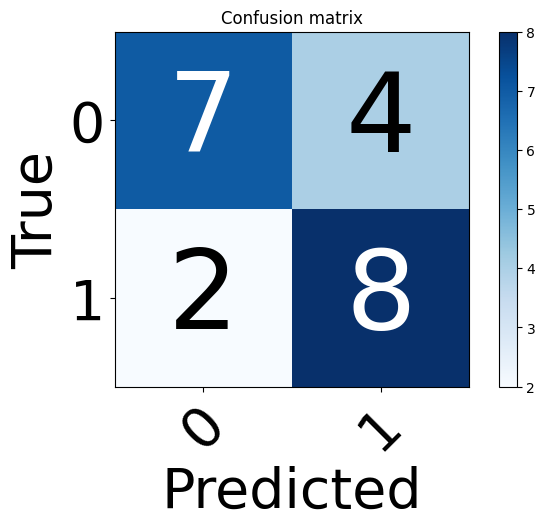

Recall (Sensitivity) =  0.80
Specificity =     0.64
Accuracy =     0.71
Precision(PPV) =     0.67
NPV =     0.78


In [49]:
X_test = df_test_all[["d0", "d1", "d2", "d3", "d4","d5", "d6","d7"]]
y_test = df_test_all["label"].astype('int')
# X_, X_test, y_, y_test= train_test_split(df_x,df_y,test_size = 0.2,random_state=1)

xgdmat_test = xgb.DMatrix(X_test, y_test)
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.40 #original thresh = 0.08
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )

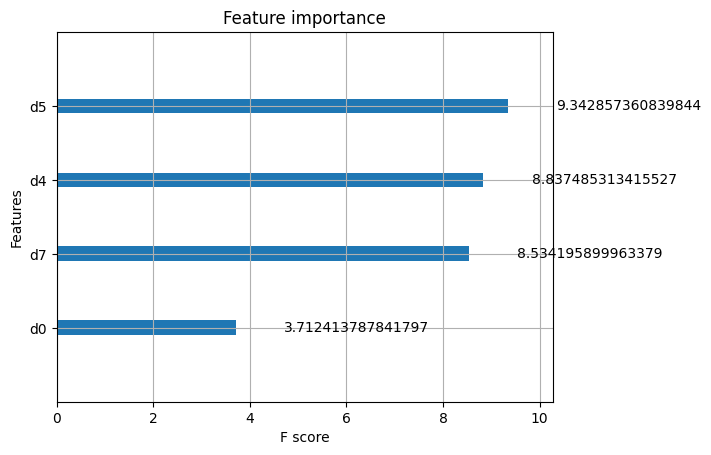

In [50]:
xgb.plot_importance(xgb_final, importance_type = "gain")
plt.show()

In [51]:
''' 
Table 3: SNHL cases recognized by the above AI models

'''

' \nTable 3: SNHL cases recognized by the above AI models\n\n'

In [52]:
#coding:utf-8
import cv2, os
import glob
import numpy as np
import pandas as pd
import math
import copy
from itertools import chain
import time
import subprocess
from PIL import Image
import matplotlib.pyplot as plt

In [53]:
''' 
Table 3
    Model 1: Fig.3C EfficientNetV2S model using standardized audiograms
'''

' \nTable 3\n    Model 1: Fig.3C EfficientNetV2S model using standardized audiograms\n'

In [54]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
from pathlib import Path
import seaborn as sns
import timm

In [55]:
test_dataset_dir = Path('../data/datasets/table4_data/NT77_stdfullgraph') 

In [56]:
test_transforms = transforms.Compose(
    [
        transforms.Resize((384, 384)),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

In [57]:
test_data = datasets.ImageFolder(test_dataset_dir, test_transforms)
test_loader = DataLoader(dataset = test_data, batch_size=4, shuffle=True)

In [58]:
def torch_load(file_name):
    with open(file_name, 'rb') as f:
        return torch.load(f, torch.device('cpu')) 

In [59]:
!python -c "import timm; print(timm.__version__)"

1.0.12


In [ ]:
model = torch_load('../data/models/anlaysis/redrawfullgraph_EfficientNetV2Smodel2_weight.pth')

In [61]:
device = torch.device('cpu')
test_cor = []
test_pred = []
# image_data = []
for data, label in test_loader:
  # image_data.append(data)
  data = data.to(device)
  label = label.to(device)

  test_output = model(data)
  test_predict = test_output.argmax(dim=1)
  test_pred.append(test_predict)
  test_cor.append(label)

In [62]:
test_pred_list =[]
test_cor_list = []
for each_batch in test_pred:
  for item in each_batch:
    item=item.tolist()
    test_pred_list.append(item)
print(test_pred_list)

[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [63]:
for each_batch in test_cor:
  for item in each_batch:
    item=item.tolist()
    test_cor_list.append(item)
print(test_cor_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


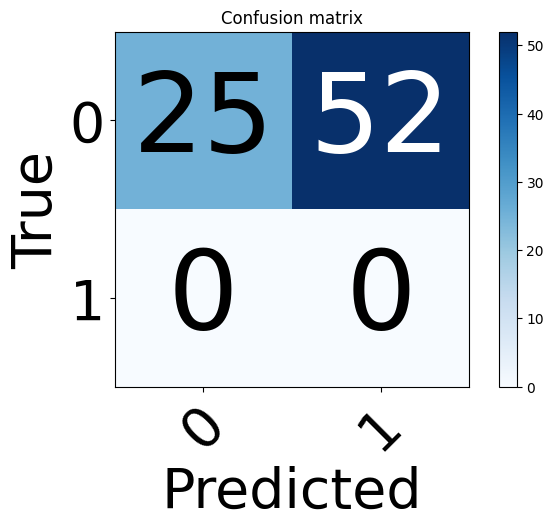

Recall (Sensitivity) = Undefined (tp + fn = 0)
Specificity =     0.32
Accuracy =     0.32
Precision(PPV) =     0.00
NPV =     1.00
False positive rate  =     0.68


In [64]:
from sklearn.metrics import confusion_matrix
from utilities.general.plotconfusionmatrix2 import plot_confusion_matrix
cm = confusion_matrix(test_cor_list, test_pred_list)
plot_confusion_matrix(cm, ['0', '1'], )

In [65]:
# Please note the above False positive rate

In [66]:
''' 
Table 3
    Model 2: Fig.3F MLP model using air-conduction thresholds
'''

' \nTable 3\n    Model 2: Fig.3F MLP model using air-conduction thresholds\n'

In [67]:
#To prepare test data
from utilities.df_preps.fig3f_ac_df_prep3 import prepare1_RL_df_point3
YOLOIMG_FILE_DIR = "../data/datasets/table4_data/yolodetect_NT77_save_dir"
test_df = prepare1_RL_df_point3(YOLOIMG_FILE_DIR)
test_df=test_df.drop('initial_cont', axis=0)
test_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,label
0_NT28_0_0,156.0,153.0,130.0,96.0,170.0,189.0,235.0,244.0,251.0,281.0,281.0,268.0,277.0,249.0,266.0,245.0,0.0
0_NT38_0_0,118.0,116.0,220.0,219.0,219.0,206.0,207.0,228.0,105.0,105.0,94.0,94.0,94.0,70.0,71.0,111.0,0.0
0_NT75_0_0,106.0,106.0,119.0,123.0,159.0,182.0,209.0,209.0,104.0,93.0,81.0,83.0,99.0,70.0,70.0,70.0,0.0
0_NT65_0_0,132.0,131.0,131.0,94.0,94.0,94.0,95.0,100.0,184.0,204.0,182.0,406.0,105.0,101.0,95.0,100.0,0.0
0_NT17_0_0,117.0,116.0,103.0,94.0,111.0,101.0,114.0,109.0,127.0,117.0,127.0,118.0,151.0,143.0,171.0,182.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_NT56_0_0,141.0,131.0,131.0,134.0,164.0,161.0,186.0,220.0,218.0,218.0,221.0,270.0,290.0,281.0,286.0,295.0,0.0
0_NT60_0_0,122.0,128.0,105.0,78.0,79.0,90.0,93.0,104.0,209.0,215.0,181.0,165.0,131.0,162.0,195.0,210.0,0.0
0_NT70_0_0,96.0,107.0,95.0,96.0,135.0,153.0,127.0,83.0,96.0,107.0,95.0,95.0,96.0,104.0,92.0,82.0,0.0
0_NT02_0_0,156.0,145.0,145.0,131.0,117.0,111.0,116.0,111.0,130.0,119.0,119.0,91.0,83.0,97.0,105.0,105.0,0.0


In [68]:
X_test = test_df.loc[:, :'lp7']
y_test = test_df.loc[:, 'label'].astype(int).values

In [69]:
from sklearn.preprocessing import StandardScaler
import joblib 
# define standard scaler
scaler = StandardScaler()
scaler = joblib.load('../data/models/anlaysis/tumorMLPscaler.gz')

In [70]:
# transform data
X_test = scaler.transform(X_test)
X_test

array([[ 0.07904319, -0.04352837, -0.38726215, ...,  0.98137596,
         1.0868632 ,  0.5160344 ],
       [-0.68428816, -0.67651193,  0.98288377, ..., -1.52411853,
        -1.66642888, -1.39846676],
       [-0.92534016, -0.84758857, -0.55472443, ..., -1.52411853,
        -1.68054833, -1.98424696],
       ...,
       [-1.12621683, -0.8304809 , -0.92009667, ..., -1.04821455,
        -1.3699205 , -1.8127991 ],
       [ 0.07904319, -0.18038968, -0.1589045 , ..., -1.14619478,
        -1.1863677 , -1.48419069],
       [ 1.38474154,  1.08557743,  0.7849738 , ...,  0.57545786,
         0.479727  ,  0.80178084]])

In [71]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 2)#number of classes: original:3 for iris classification

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [72]:
model = Model(X_test.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=16, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=2, bias=True)
)

In [73]:
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [74]:
model.load_state_dict(torch.load('../data/models/anlaysis/tumorMLPbest_model1.pt'))

<All keys matched successfully>

In [75]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_conv = torch.argmax(y_pred, dim=1)

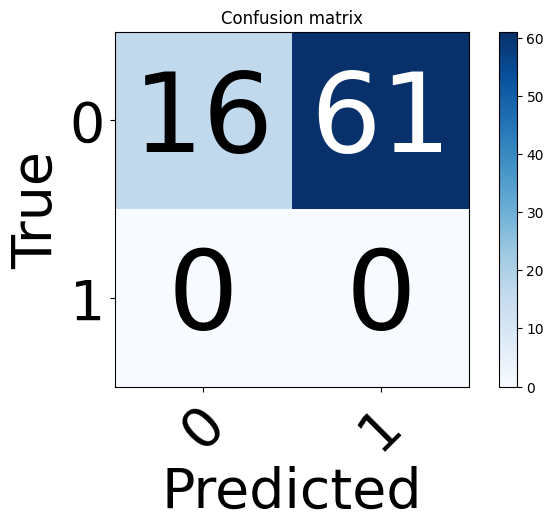

Recall (Sensitivity) = Undefined (tp + fn = 0)
Specificity =     0.21
Accuracy =     0.21
Precision(PPV) =     0.00
NPV =     1.00
False positive rate  =     0.79


In [76]:
from sklearn.metrics import confusion_matrix
from utilities.general.plotconfusionmatrix2 import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred_conv)
plot_confusion_matrix(cm, ['0', '1'], )

In [77]:
# Please note the above False positive rate

In [78]:
''' 
Table 3
    Model 3: Fig.3I EfficientNetV2S model using audiograms with the absolute right-left air-conduction difference painted black
'''

' \nTable 3\n    Model 3: Fig.3I EfficientNetV2S model using audiograms with the absolute right-left air-conduction difference painted black\n'

In [79]:
test_dataset_dir = Path('../data/datasets/table4_data/snhl77_absdiffpainted') 

In [80]:
test_data = datasets.ImageFolder(test_dataset_dir, test_transforms)
test_loader = DataLoader(dataset = test_data, batch_size=4, shuffle=True)

In [81]:
def torch_load(file_name):
    with open(file_name, 'rb') as f:
        return torch.load(f, torch.device('cpu')) 

In [82]:
model = torch_load('../data/models/anlaysis/absareadiff_EfficientNetV2Smodel_weight.pth')

In [83]:
device = torch.device('cpu')
test_cor = []
test_pred = []
# image_data = []
for data, label in test_loader:
  # image_data.append(data)
  data = data.to(device)
  label = label.to(device)

  test_output = model(data)
  test_predict = test_output.argmax(dim=1)
  test_pred.append(test_predict)
  test_cor.append(label)

In [84]:
test_pred_list =[]
test_cor_list = []
for each_batch in test_pred:
  for item in each_batch:
    item=item.tolist()
    test_pred_list.append(item)
print(test_pred_list)

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]


In [85]:
for each_batch in test_cor:
  for item in each_batch:
    item=item.tolist()
    test_cor_list.append(item)
print(test_cor_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


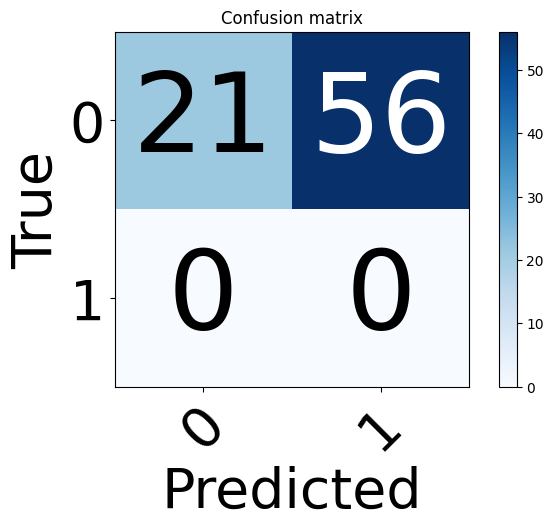

Recall (Sensitivity) = Undefined (tp + fn = 0)
Specificity =     0.27
Accuracy =     0.27
Precision(PPV) =     0.00
NPV =     1.00
False positive rate  =     0.73


In [86]:
cm = confusion_matrix(test_cor_list, test_pred_list)
plot_confusion_matrix(cm, ['0', '1'], )

In [87]:
# Please note the above False positive rate

In [88]:
''' 
Table 3
    Model 4: Fig.3J XGBoost model using a df with the absolute right-left air-conduction differences

'''

' \nTable 3\n    Model 4: Fig.3J XGBoost model using a df with the absolute right-left air-conduction differences\n\n'

In [89]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from utilities.general.plotconfusionmatrix2 import plot_confusion_matrix
import pickle
xgb_final = pickle.load(open("../data/models/anlaysis/absdiff_xgb_model_20230720.pickle", "rb"))

In [90]:
from utilities.df_preps.fig3j_ad_absdif_df_prep3 import prepare_RL_df_differential3
YOLOIMG_FILE_DIR = "/Users/tesutoyoukanrisha/studioーGitHub/CodeOceanAudiogram1/data/datasets/table4_data/yolodetect_NT77_save_dir"
df_test = prepare_RL_df_differential3(YOLOIMG_FILE_DIR)
df_test=df_test.drop('initial_cont', axis=0)#to remove level0 control
df_test

,d0,d1,d2,d3,d4,d5,d6,d7,label
0_NT28_0_0_R,95.0,128.0,151.0,172.0,107.0,60.0,31.0,1.0,0.0
0_NT38_0_0_R,13.0,11.0,126.0,125.0,125.0,136.0,136.0,117.0,0.0
0_NT75_0_0_R,2.0,13.0,38.0,40.0,60.0,112.0,139.0,139.0,0.0
0_NT65_0_0_R,52.0,73.0,51.0,312.0,11.0,7.0,0.0,0.0,0.0
0_NT17_0_0_R,10.0,1.0,24.0,24.0,40.0,42.0,57.0,73.0,0.0
...,...,...,...,...,...,...,...,...,...
0_NT56_0_0_R,77.0,87.0,90.0,136.0,126.0,120.0,100.0,75.0,0.0
0_NT60_0_0_R,87.0,87.0,76.0,87.0,52.0,72.0,102.0,106.0,0.0
0_NT70_0_0_R,0.0,0.0,0.0,1.0,39.0,49.0,35.0,1.0,0.0
0_NT02_0_0_R,26.0,26.0,26.0,40.0,34.0,14.0,11.0,6.0,0.0


In [91]:
X_test = df_test[["d0", "d1", "d2", "d3", "d4","d5", "d6","d7"]]
y_test = df_test["label"].astype('int')

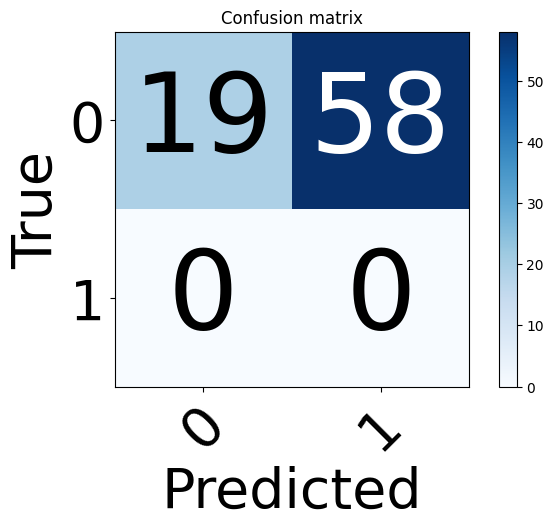

Recall (Sensitivity) = Undefined (tp + fn = 0)
Specificity =     0.25
Accuracy =     0.25
Precision(PPV) =     0.00
NPV =     1.00
False positive rate  =     0.75


In [92]:
xgdmat_test = xgb.DMatrix(X_test, y_test)
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.40 #original thresh = 0.08
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )

In [93]:
# Please note the above False positive rate

In [94]:
''' 
 Figs. 4A-C Air-conduction MLP model between tumor and non-tumor SNHL cases
'''

' \n Figs. 4A-C Air-conduction MLP model between tumor and non-tumor SNHL cases\n'

In [95]:
'''
Prepare tumor detection data as DataFrame (df)
air conduction L or R :p0 (125 Hz), p1 (250 Hz), p2 (500 Hz), p3 (1000Hz)
p4 (2000 Hz), p5 (3000 Hz), p6 (4000 Hz), p7 (8000 Hz)
labels: non-tumor(0),tumor (L or R) (1)

measurement (mm) (points as pixels)
total 165 (416 pixels)
p0:14 (35 px)
p1:36 (90 px)
p2:58 (146 px)
p3:82 (207 px)
p4:106 (267 px)
p5:120 (303 px)
p6:130 (328 px)
p7:150 (378 px)
 '''

'\nPrepare tumor detection data as DataFrame (df)\nair conduction L or R :p0 (125 Hz), p1 (250 Hz), p2 (500 Hz), p3 (1000Hz)\np4 (2000 Hz), p5 (3000 Hz), p6 (4000 Hz), p7 (8000 Hz)\nlabels: non-tumor(0),tumor (L or R) (1)\n\nmeasurement (mm) (points as pixels)\ntotal 165 (416 pixels)\np0:14 (35 px)\np1:36 (90 px)\np2:58 (146 px)\np3:82 (207 px)\np4:106 (267 px)\np5:120 (303 px)\np6:130 (328 px)\np7:150 (378 px)\n '

In [96]:
#To prepare training data
from utilities.df_preps.fig4c_ac_df_prep import prepare_RL_df_point
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig4c/trainval_yolosavedir"
trainval_df = prepare_RL_df_point(YOLOIMG_FILE_DIR)
trainval_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,label
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_NT28_0_0,156.0,153.0,130.0,96.0,170.0,189.0,235.0,244.0,251.0,281.0,281.0,268.0,277.0,249.0,266.0,245.0,0.0
0_NT38_0_0,118.0,116.0,220.0,219.0,219.0,206.0,207.0,228.0,105.0,105.0,94.0,94.0,94.0,70.0,71.0,111.0,0.0
1_PTA52_1_0,248.0,294.0,345.0,347.0,347.0,347.0,344.0,323.0,103.0,103.0,127.0,141.0,157.0,191.0,186.0,236.0,1.0
0_NT75_0_0,106.0,106.0,119.0,123.0,159.0,182.0,209.0,209.0,104.0,93.0,81.0,83.0,99.0,70.0,70.0,70.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_PTA25_1_0,266.0,291.0,340.0,345.0,345.0,346.0,346.0,323.0,160.0,166.0,144.0,155.0,191.0,168.0,182.0,213.0,1.0
1_PTA26_0_1,95.0,93.0,84.0,143.0,154.0,140.0,155.0,144.0,250.0,297.0,342.0,342.0,342.0,342.0,339.0,317.0,1.0
1_PTA36_0_1,105.0,105.0,105.0,119.0,124.0,101.0,115.0,110.0,251.0,263.0,230.0,195.0,315.0,318.0,317.0,297.0,1.0
1_PTA68_1_0,129.0,129.0,128.0,166.0,194.0,200.0,227.0,252.0,103.0,102.0,102.0,91.0,92.0,102.0,107.0,116.0,1.0


In [97]:
#To prepare test df
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig4c/test_yolosave_dir"
test_df = prepare_RL_df_point(YOLOIMG_FILE_DIR)
test_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,label
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_PTA33_0_1,107.0,107.0,106.0,100.0,159.0,164.0,167.0,191.0,134.0,146.0,175.0,234.0,250.0,237.0,249.0,258.0,1.0
1_PTA23_0_1,141.0,118.0,106.0,95.0,94.0,84.0,85.0,94.0,141.0,119.0,132.0,110.0,186.0,230.0,218.0,195.0,1.0
0_NT53_0_0,146.0,159.0,133.0,106.0,96.0,93.0,84.0,89.0,107.0,106.0,95.0,95.0,84.0,93.0,84.0,89.0,0.0
0_NT43_0_0,103.0,95.0,95.0,94.0,82.0,82.0,82.0,82.0,222.0,243.0,232.0,232.0,244.0,239.0,219.0,206.0,0.0
1_PTA83_0_1,128.0,118.0,127.0,92.0,81.0,81.0,81.0,81.0,250.0,297.0,344.0,345.0,345.0,345.0,340.0,318.0,1.0
1_PTA53_1_0,145.0,134.0,107.0,107.0,123.0,143.0,153.0,143.0,120.0,106.0,106.0,107.0,120.0,124.0,136.0,141.0,1.0
1_PTA43_0_1,102.0,95.0,95.0,95.0,94.0,87.0,96.0,96.0,113.0,119.0,144.0,292.0,344.0,349.0,342.0,332.0,1.0
0_NT23_0_0,157.0,157.0,157.0,181.0,181.0,184.0,209.0,242.0,163.0,210.0,257.0,255.0,233.0,230.0,233.0,244.0,0.0
0_NT33_0_0,145.0,170.0,182.0,195.0,207.0,186.0,212.0,279.0,120.0,120.0,108.0,94.0,82.0,82.0,82.0,82.0,0.0


In [98]:
X_train = trainval_df.loc[:, :'lp7']
y_train = trainval_df['label'].astype(int).values

X_test = test_df.loc[:, :'lp7']
y_test = test_df.loc[:, 'label'].astype(int).values

In [99]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
  
# transform data
X_train = scaler.fit_transform(X_train)
X_train

array([[-2.7227694 , -2.33471579, -2.04340874, ..., -2.17704445,
        -2.25624517, -2.43474305],
       [ 0.20131174,  0.05487202, -0.28736139, ...,  1.13090113,
         1.23333473,  0.81777629],
       [-0.51096443, -0.52300216,  0.9283637 , ..., -1.24709991,
        -1.32481595, -0.96115265],
       ...,
       [-0.75463786, -0.69480259, -0.6250628 , ...,  2.04756074,
         1.90238952,  1.50810693],
       [-0.30477923, -0.31996529, -0.3143775 , ..., -0.82198241,
        -0.85254198, -0.89477471],
       [ 1.96325807,  2.31951405,  2.67090299, ..., -1.04782608,
        -0.77382965, -1.22666444]])

In [100]:
# transform data
X_test = scaler.fit_transform(X_test)
X_test

array([[-3.2515653 , -3.04018765, -2.79963517, -2.62013869, -2.61638556,
        -2.49754982, -2.34815519, -2.17943918, -2.37571157, -2.00407248,
        -1.80556037, -1.92838631, -1.93763287, -1.99446708, -2.02991041,
        -2.20693018],
       [-0.43188283, -0.33561425, -0.27639289, -0.37537446,  0.77496203,
         0.91734924,  0.63139504,  0.57328378, -0.09184696, -0.01061961,
         0.19356623,  0.62100576,  0.63748465,  0.45610797,  0.56360682,
         0.66393362],
       [ 0.46409104, -0.05757399, -0.27639289, -0.48761267, -0.61143793,
        -0.74845518, -0.83161765, -0.82469594,  0.0274594 , -0.37927185,
        -0.29764774, -0.72995414, -0.02174544,  0.38372811,  0.24071914,
        -0.03709126],
       [ 0.5958519 ,  0.97875787,  0.36631976, -0.24068861, -0.56877947,
        -0.56105218, -0.84945927, -0.89675675, -0.55202863, -0.55677108,
        -0.72032022, -0.89337671, -1.07239339, -1.03284902, -1.15498893,
        -1.21659344],
       [-0.53729152, -0.63893089, -0

In [101]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 2)#number of classes: original:3 for iris classification

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [102]:
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=16, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=2, bias=True)
)

In [103]:
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [104]:
# #training: the results may vary and may be different from the previous published data

# import tqdm
# import numpy as np 

# EPOCHS = 100

# loss_list = np.zeros((EPOCHS, ))
# accuracy_list = np.zeros((EPOCHS, ))
# best_accuracy = 0.0

# for epoch in tqdm.trange(EPOCHS):
#     #model.train()
#     y_pred = model(X_train)
#     loss = loss_fn(y_pred, y_train)
#     print(loss.item())
#     loss_list[epoch] = loss.item()

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     #model.eval()

#     with torch.no_grad():
#         y_pred = model(X_test)
#         correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
#         accuracy_list[epoch] = correct.mean()
#         if best_accuracy < correct.mean():
#             torch.save(model.state_dict(), 'best_model.pt')
#             best_accuracy = correct.mean()


In [105]:
# import matplotlib.pyplot as plt

# fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

# ax1.plot(loss_list)
# ax1.set_ylabel('train loss')
# ax2.plot(accuracy_list)
# ax2.set_ylabel('validation accuracy')
# ax2.set_xlabel('epochs')

In [106]:
model.load_state_dict(torch.load('../data/models/anlaysis/fig4c_ac_MLP_model.pt'))

<All keys matched successfully>

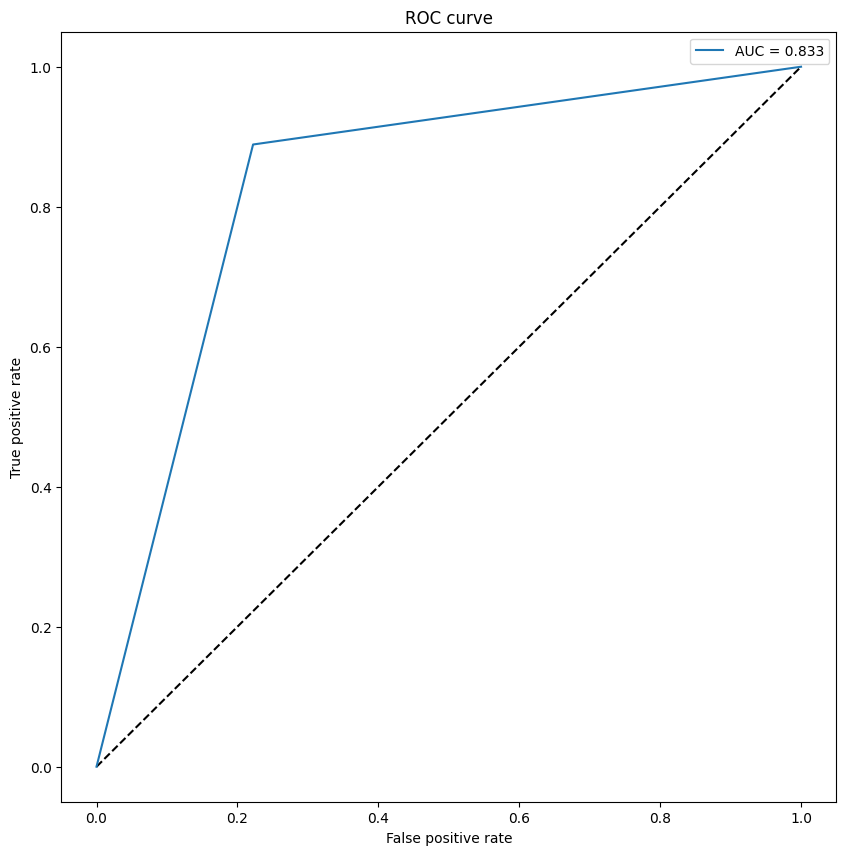

In [107]:
# ROC
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_conv = torch.argmax(y_pred, dim=1)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred_conv.ravel())
    # fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

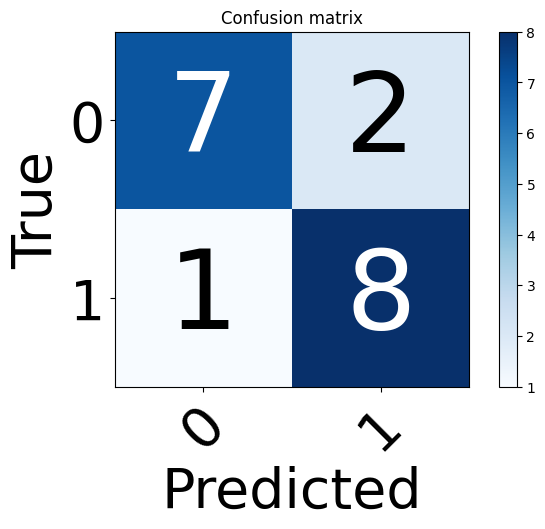

Recall (Sensitivity) =  0.89
Specificity =     0.78
Accuracy =     0.83
Precision(PPV) =     0.80
NPV =     0.88


In [108]:
from sklearn.metrics import confusion_matrix
from utilities.general.plotconfusionmatrix import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred_conv)
plot_confusion_matrix(cm, ['0', '1'], )

In [109]:
''' 
Figs. 4D-E: XGBoost for distinguishing between tumor and non-tumor SNHL cases

'''

' \nFigs. 4D-E: XGBoost for distinguishing between tumor and non-tumor SNHL cases\n\n'

In [110]:
#To prepare training data
from utilities.df_preps.fig4c_ac_df_prep import prepare_RL_df_point
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig4c/trainval_yolosavedir"
trainval_df = prepare_RL_df_point(YOLOIMG_FILE_DIR)
trainval_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,label
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_NT28_0_0,156.0,153.0,130.0,96.0,170.0,189.0,235.0,244.0,251.0,281.0,281.0,268.0,277.0,249.0,266.0,245.0,0.0
0_NT38_0_0,118.0,116.0,220.0,219.0,219.0,206.0,207.0,228.0,105.0,105.0,94.0,94.0,94.0,70.0,71.0,111.0,0.0
1_PTA52_1_0,248.0,294.0,345.0,347.0,347.0,347.0,344.0,323.0,103.0,103.0,127.0,141.0,157.0,191.0,186.0,236.0,1.0
0_NT75_0_0,106.0,106.0,119.0,123.0,159.0,182.0,209.0,209.0,104.0,93.0,81.0,83.0,99.0,70.0,70.0,70.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_PTA25_1_0,266.0,291.0,340.0,345.0,345.0,346.0,346.0,323.0,160.0,166.0,144.0,155.0,191.0,168.0,182.0,213.0,1.0
1_PTA26_0_1,95.0,93.0,84.0,143.0,154.0,140.0,155.0,144.0,250.0,297.0,342.0,342.0,342.0,342.0,339.0,317.0,1.0
1_PTA36_0_1,105.0,105.0,105.0,119.0,124.0,101.0,115.0,110.0,251.0,263.0,230.0,195.0,315.0,318.0,317.0,297.0,1.0
1_PTA68_1_0,129.0,129.0,128.0,166.0,194.0,200.0,227.0,252.0,103.0,102.0,102.0,91.0,92.0,102.0,107.0,116.0,1.0


In [111]:
#To prepare test df
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig4c/test_yolosave_dir"
test_df = prepare_RL_df_point(YOLOIMG_FILE_DIR)
test_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,label
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_PTA33_0_1,107.0,107.0,106.0,100.0,159.0,164.0,167.0,191.0,134.0,146.0,175.0,234.0,250.0,237.0,249.0,258.0,1.0
1_PTA23_0_1,141.0,118.0,106.0,95.0,94.0,84.0,85.0,94.0,141.0,119.0,132.0,110.0,186.0,230.0,218.0,195.0,1.0
0_NT53_0_0,146.0,159.0,133.0,106.0,96.0,93.0,84.0,89.0,107.0,106.0,95.0,95.0,84.0,93.0,84.0,89.0,0.0
0_NT43_0_0,103.0,95.0,95.0,94.0,82.0,82.0,82.0,82.0,222.0,243.0,232.0,232.0,244.0,239.0,219.0,206.0,0.0
1_PTA83_0_1,128.0,118.0,127.0,92.0,81.0,81.0,81.0,81.0,250.0,297.0,344.0,345.0,345.0,345.0,340.0,318.0,1.0
1_PTA53_1_0,145.0,134.0,107.0,107.0,123.0,143.0,153.0,143.0,120.0,106.0,106.0,107.0,120.0,124.0,136.0,141.0,1.0
1_PTA43_0_1,102.0,95.0,95.0,95.0,94.0,87.0,96.0,96.0,113.0,119.0,144.0,292.0,344.0,349.0,342.0,332.0,1.0
0_NT23_0_0,157.0,157.0,157.0,181.0,181.0,184.0,209.0,242.0,163.0,210.0,257.0,255.0,233.0,230.0,233.0,244.0,0.0
0_NT33_0_0,145.0,170.0,182.0,195.0,207.0,186.0,212.0,279.0,120.0,120.0,108.0,94.0,82.0,82.0,82.0,82.0,0.0


In [112]:
X_train = trainval_df.loc[:, :'lp7']
y_train = trainval_df['label'].astype(int).values
X_test = test_df.loc[:, :'lp7']
y_test = test_df.loc[:, 'label'].astype(int).values

In [113]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
  
# transform data
X_train = scaler.fit_transform(X_train)
X_train

array([[-2.7227694 , -2.33471579, -2.04340874, ..., -2.17704445,
        -2.25624517, -2.43474305],
       [ 0.20131174,  0.05487202, -0.28736139, ...,  1.13090113,
         1.23333473,  0.81777629],
       [-0.51096443, -0.52300216,  0.9283637 , ..., -1.24709991,
        -1.32481595, -0.96115265],
       ...,
       [-0.75463786, -0.69480259, -0.6250628 , ...,  2.04756074,
         1.90238952,  1.50810693],
       [-0.30477923, -0.31996529, -0.3143775 , ..., -0.82198241,
        -0.85254198, -0.89477471],
       [ 1.96325807,  2.31951405,  2.67090299, ..., -1.04782608,
        -0.77382965, -1.22666444]])

In [114]:
# transform data
X_test = scaler.fit_transform(X_test)
X_test

array([[-3.2515653 , -3.04018765, -2.79963517, -2.62013869, -2.61638556,
        -2.49754982, -2.34815519, -2.17943918, -2.37571157, -2.00407248,
        -1.80556037, -1.92838631, -1.93763287, -1.99446708, -2.02991041,
        -2.20693018],
       [-0.43188283, -0.33561425, -0.27639289, -0.37537446,  0.77496203,
         0.91734924,  0.63139504,  0.57328378, -0.09184696, -0.01061961,
         0.19356623,  0.62100576,  0.63748465,  0.45610797,  0.56360682,
         0.66393362],
       [ 0.46409104, -0.05757399, -0.27639289, -0.48761267, -0.61143793,
        -0.74845518, -0.83161765, -0.82469594,  0.0274594 , -0.37927185,
        -0.29764774, -0.72995414, -0.02174544,  0.38372811,  0.24071914,
        -0.03709126],
       [ 0.5958519 ,  0.97875787,  0.36631976, -0.24068861, -0.56877947,
        -0.56105218, -0.84945927, -0.89675675, -0.55202863, -0.55677108,
        -0.72032022, -0.89337671, -1.07239339, -1.03284902, -1.15498893,
        -1.21659344],
       [-0.53729152, -0.63893089, -0

In [115]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import itertools

In [116]:
X_, X_test, y_, y_test= X_train, X_test, y_train, y_test

In [117]:
xgdmat_train = xgb.DMatrix(X_, y_)
xgdmat_test = xgb.DMatrix(X_test, y_test)

In [118]:
import pickle
xgb_final = pickle.load(open("../data/models/anlaysis/fig4DE_ac_xgb_model.pickle", "rb"))

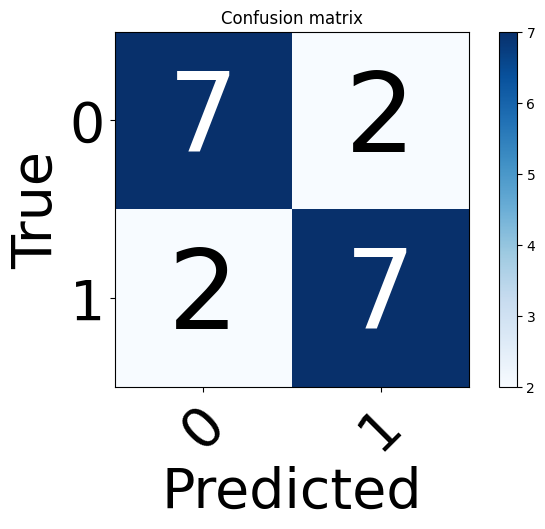

Recall (Sensitivity) =  0.78
Specificity =     0.78
Accuracy =     0.78
Precision(PPV) =     0.78
NPV =     0.78


In [119]:
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.56
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )

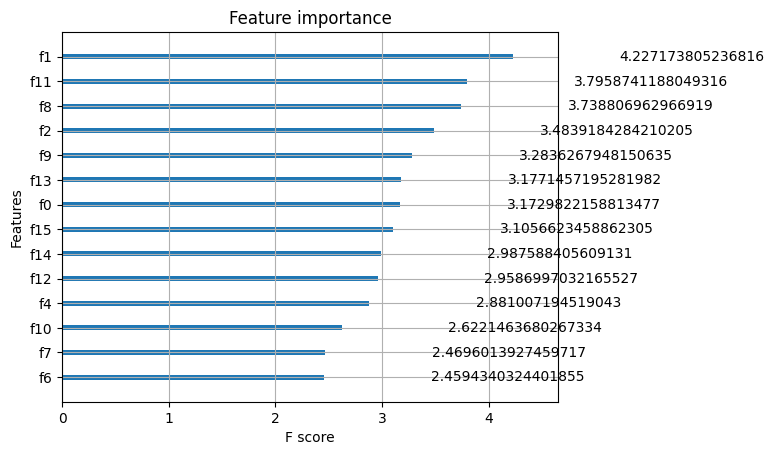

In [120]:
xgb.plot_importance(xgb_final, importance_type = "gain")
plt.show()

In [121]:
''' 
Fig. 4F: MLP model using a df without low-frequency thresholds (125, 250 Hz)

'''

' \nFig. 4F: MLP model using a df without low-frequency thresholds (125, 250 Hz)\n\n'

In [122]:
#To prepare training data
from utilities.df_preps.fig4c_ac_df_prep import prepare_RL_df_point
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig4c/trainval_yolosavedir"
trainval_df = prepare_RL_df_point(YOLOIMG_FILE_DIR)
X_train= trainval_df.drop(['rp0','rp1','lp0','lp1','label'], axis=1)
X_train


,rp2,rp3,rp4,rp5,rp6,rp7,lp2,lp3,lp4,lp5,lp6,lp7
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_NT28_0_0,130.0,96.0,170.0,189.0,235.0,244.0,281.0,268.0,277.0,249.0,266.0,245.0
0_NT38_0_0,220.0,219.0,219.0,206.0,207.0,228.0,94.0,94.0,94.0,70.0,71.0,111.0
1_PTA52_1_0,345.0,347.0,347.0,347.0,344.0,323.0,127.0,141.0,157.0,191.0,186.0,236.0
0_NT75_0_0,119.0,123.0,159.0,182.0,209.0,209.0,81.0,83.0,99.0,70.0,70.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1_PTA25_1_0,340.0,345.0,345.0,346.0,346.0,323.0,144.0,155.0,191.0,168.0,182.0,213.0
1_PTA26_0_1,84.0,143.0,154.0,140.0,155.0,144.0,342.0,342.0,342.0,342.0,339.0,317.0
1_PTA36_0_1,105.0,119.0,124.0,101.0,115.0,110.0,230.0,195.0,315.0,318.0,317.0,297.0
1_PTA68_1_0,128.0,166.0,194.0,200.0,227.0,252.0,102.0,91.0,92.0,102.0,107.0,116.0


In [123]:
#To prepare test df
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig4c/test_yolosave_dir"
test_df = prepare_RL_df_point(YOLOIMG_FILE_DIR)
X_test= test_df.drop(['rp0','rp1','lp0','lp1','label'], axis=1)
X_test

,rp2,rp3,rp4,rp5,rp6,rp7,lp2,lp3,lp4,lp5,lp6,lp7
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_PTA33_0_1,106.0,100.0,159.0,164.0,167.0,191.0,175.0,234.0,250.0,237.0,249.0,258.0
1_PTA23_0_1,106.0,95.0,94.0,84.0,85.0,94.0,132.0,110.0,186.0,230.0,218.0,195.0
0_NT53_0_0,133.0,106.0,96.0,93.0,84.0,89.0,95.0,95.0,84.0,93.0,84.0,89.0
0_NT43_0_0,95.0,94.0,82.0,82.0,82.0,82.0,232.0,232.0,244.0,239.0,219.0,206.0
1_PTA83_0_1,127.0,92.0,81.0,81.0,81.0,81.0,344.0,345.0,345.0,345.0,340.0,318.0
1_PTA53_1_0,107.0,107.0,123.0,143.0,153.0,143.0,106.0,107.0,120.0,124.0,136.0,141.0
1_PTA43_0_1,95.0,95.0,94.0,87.0,96.0,96.0,144.0,292.0,344.0,349.0,342.0,332.0
0_NT23_0_0,157.0,181.0,181.0,184.0,209.0,242.0,257.0,255.0,233.0,230.0,233.0,244.0
0_NT33_0_0,182.0,195.0,207.0,186.0,212.0,279.0,108.0,94.0,82.0,82.0,82.0,82.0


In [124]:
y_test = test_df.loc[:, 'label'].astype(int).values
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [125]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
  
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [126]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 2)#number of classes: original:3 for iris classification

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [127]:
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=12, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=2, bias=True)
)

In [128]:
# train
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [129]:
model.load_state_dict(torch.load('../data/models/anlaysis/fig4f_MLP_wo_125_250_model2.pt'))

<All keys matched successfully>

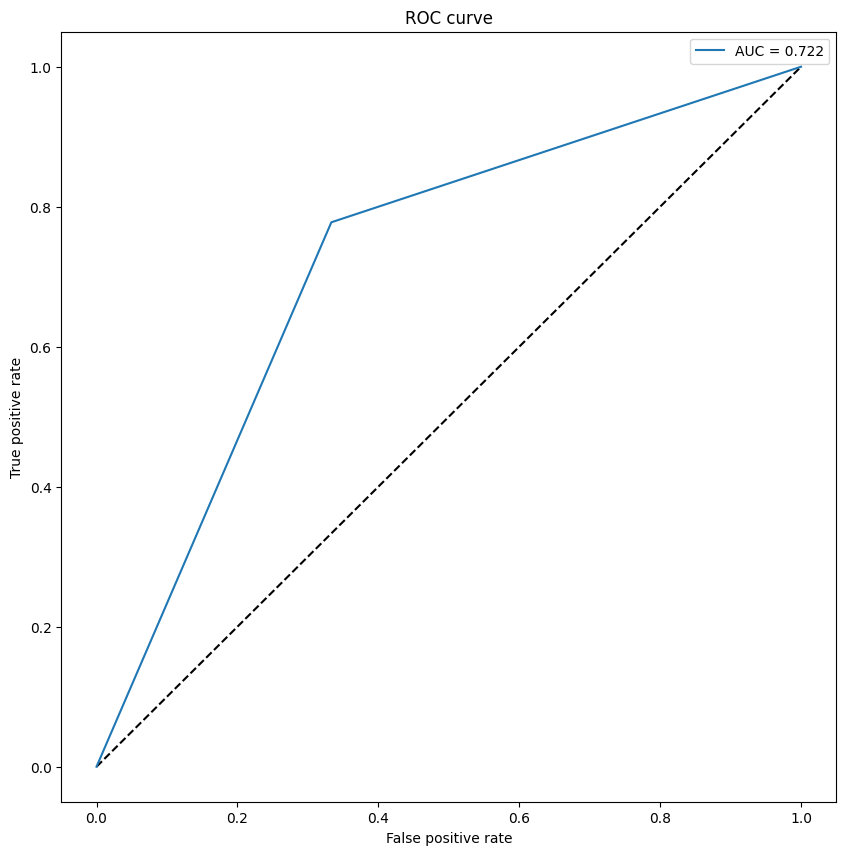

In [130]:
# ROC

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_conv = torch.argmax(y_pred, dim=1)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred_conv.ravel())
    # fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

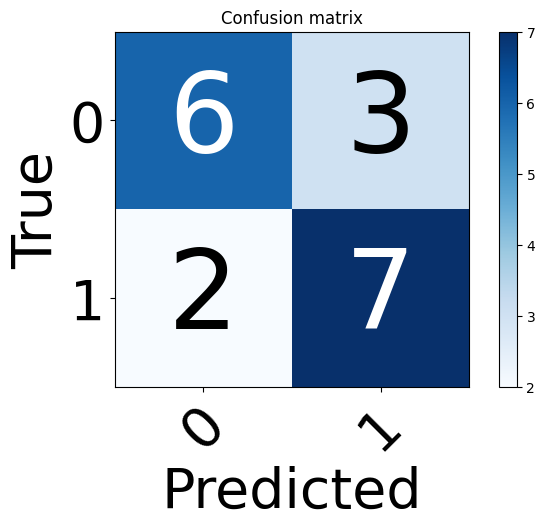

Recall (Sensitivity) =  0.78
Specificity =     0.67
Accuracy =     0.72
Precision(PPV) =     0.70
NPV =     0.75


In [131]:
from sklearn.metrics import confusion_matrix
from utilities.general.plotconfusionmatrix import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred_conv)
plot_confusion_matrix(cm, ['0', '1'], )

In [132]:
''' 
Fig. 4I: MLP model using a df with air-conduction (ac) and bone-conduction (bc)

'''

' \nFig. 4I: MLP model using a df with air-conduction (ac) and bone-conduction (bc)\n\n'

In [133]:
#To prepare training data
from utilities.df_preps.fig4i_acbc_df_prep import prepare_RL_acbc_df_point
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig4c/trainval_yolosavedir"
trainval_df = prepare_RL_acbc_df_point(YOLOIMG_FILE_DIR)
trainval_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,rbcp1,rbcp2,...,lp5,lp6,lp7,lbcp1,lbcp2,lbcp3,lbcp4,lbcp5,lbcp6,label
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_NT28_0_0,156.0,153.0,130.0,96.0,170.0,189.0,235.0,244.0,143.0,133.0,...,249.0,266.0,245.0,214.0,233.0,235.0,245.0,232.0,227.0,0.0
0_NT38_0_0,118.0,116.0,220.0,219.0,219.0,206.0,207.0,228.0,110.0,198.0,...,70.0,71.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_PTA52_1_0,248.0,294.0,345.0,347.0,347.0,347.0,344.0,323.0,207.0,226.0,...,191.0,186.0,236.0,116.0,129.0,153.0,141.0,141.0,141.0,1.0
0_NT75_0_0,106.0,106.0,119.0,123.0,159.0,182.0,209.0,209.0,107.0,117.0,...,70.0,70.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_PTA25_1_0,266.0,291.0,340.0,345.0,345.0,346.0,346.0,323.0,0.0,0.0,...,168.0,182.0,213.0,177.0,143.0,159.0,171.0,142.0,142.0,1.0
1_PTA26_0_1,95.0,93.0,84.0,143.0,154.0,140.0,155.0,144.0,0.0,0.0,...,342.0,339.0,317.0,207.0,222.0,245.0,245.0,231.0,225.0,1.0
1_PTA36_0_1,105.0,105.0,105.0,119.0,124.0,101.0,115.0,110.0,0.0,0.0,...,318.0,317.0,297.0,192.0,200.0,192.0,243.0,224.0,219.0,1.0
1_PTA68_1_0,129.0,129.0,128.0,166.0,194.0,200.0,227.0,252.0,119.0,127.0,...,102.0,107.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [134]:
#To prepare test df
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig4c/test_yolosave_dir"
test_df = prepare_RL_acbc_df_point(YOLOIMG_FILE_DIR)
test_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,rbcp1,rbcp2,...,lp5,lp6,lp7,lbcp1,lbcp2,lbcp3,lbcp4,lbcp5,lbcp6,label
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_PTA33_0_1,107.0,107.0,106.0,100.0,159.0,164.0,167.0,191.0,105.0,94.0,...,237.0,249.0,258.0,147.0,166.0,215.0,233.0,220.0,220.0,1.0
1_PTA23_0_1,141.0,118.0,106.0,95.0,94.0,84.0,85.0,94.0,0.0,0.0,...,230.0,218.0,195.0,113.0,137.0,101.0,195.0,207.0,201.0,1.0
0_NT53_0_0,146.0,159.0,133.0,106.0,96.0,93.0,84.0,89.0,167.0,147.0,...,93.0,84.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_NT43_0_0,103.0,95.0,95.0,94.0,82.0,82.0,82.0,82.0,0.0,0.0,...,239.0,219.0,206.0,194.0,195.0,211.0,228.0,220.0,220.0,0.0
1_PTA83_0_1,128.0,118.0,127.0,92.0,81.0,81.0,81.0,81.0,0.0,0.0,...,345.0,340.0,318.0,212.0,232.0,245.0,245.0,229.0,223.0,1.0
1_PTA53_1_0,145.0,134.0,107.0,107.0,123.0,143.0,153.0,143.0,121.0,108.0,...,124.0,136.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1_PTA43_0_1,102.0,95.0,95.0,95.0,94.0,87.0,96.0,96.0,0.0,0.0,...,349.0,342.0,332.0,124.0,169.0,247.0,247.0,231.0,224.0,1.0
0_NT23_0_0,157.0,157.0,157.0,181.0,181.0,184.0,209.0,242.0,167.0,158.0,...,230.0,233.0,244.0,200.0,233.0,233.0,229.0,214.0,211.0,0.0
0_NT33_0_0,145.0,170.0,182.0,195.0,207.0,186.0,212.0,279.0,133.0,153.0,...,82.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
X_train = trainval_df.loc[:, :'lbcp6']
y_train = trainval_df['label'].astype(int).values
X_test = test_df.loc[:, :'lbcp6']
y_test = test_df.loc[:, 'label'].astype(int).values

In [136]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
  
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 2)#number of classes: original:3 for iris classification

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [138]:
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=28, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=2, bias=True)
)

In [139]:
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [140]:
model.load_state_dict(torch.load('../data/models/anlaysis/fig4i_MLP_acbc.pt'))

<All keys matched successfully>

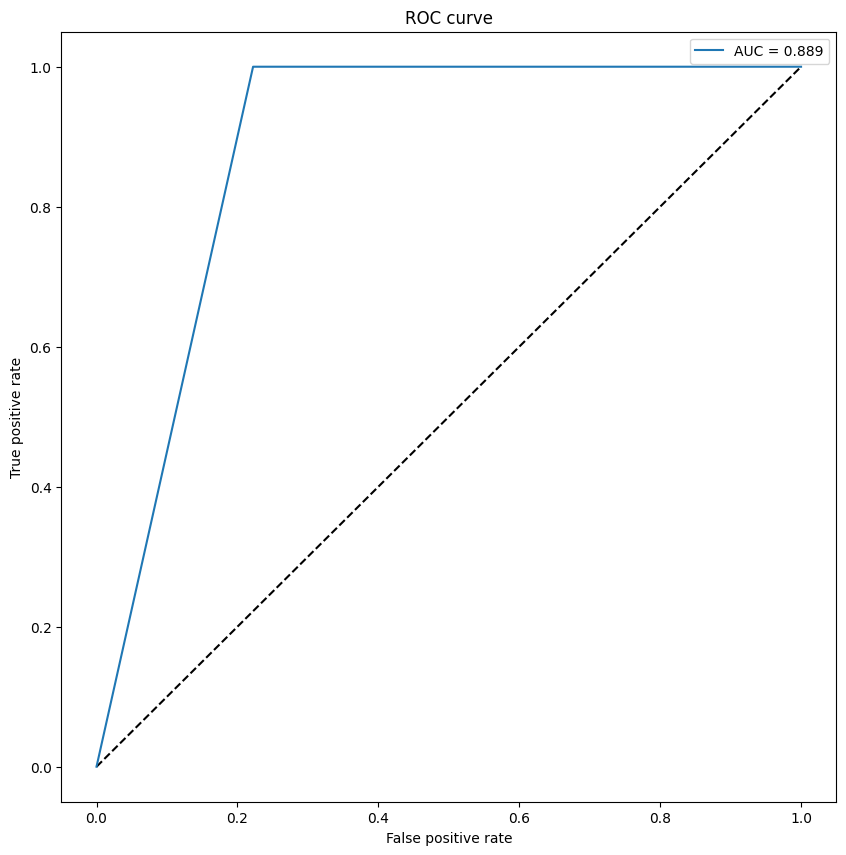

In [141]:
# ROC

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_conv = torch.argmax(y_pred, dim=1)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred_conv.ravel())
    # fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

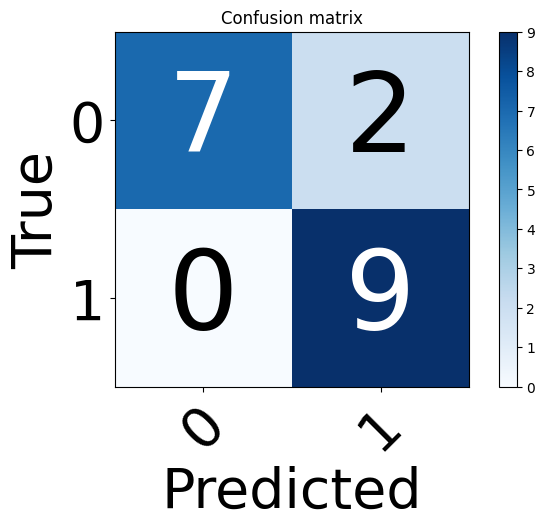

Recall (Sensitivity) =  1.00
Specificity =     0.78
Accuracy =     0.89
Precision(PPV) =     0.82
NPV =     1.00


In [142]:
cm = confusion_matrix(y_test, y_pred_conv)
plot_confusion_matrix(cm, ['0', '1'], )

In [143]:
''' 
Fig. 5A: MLP acbc model (Fig. 4I) performance in a biased test dataset

'''

' \nFig. 5A: MLP acbc model (Fig. 4I) performance in a biased test dataset\n\n'

In [144]:
#To prepare training data
from utilities.df_preps.fig5a_acbc_df_prep import prepare_RL_acbc2_df_point

YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig5a/biasedtest_yolodetect_save_dir"
test_df = prepare_RL_acbc2_df_point(YOLOIMG_FILE_DIR)
test_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,rbcp1,rbcp2,...,lp5,lp6,lp7,lbcp1,lbcp2,lbcp3,lbcp4,lbcp5,lbcp6,label
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_PTA33_0_1,101.0,102.0,101.0,89.0,152.0,162.0,157.0,213.0,100.0,89.0,...,230.0,244.0,265.0,143.0,156.0,208.0,235.0,215.0,215.0,1.0
1_PTA23_0_1,136.0,111.0,98.0,86.0,87.0,74.0,74.0,84.0,0.0,0.0,...,226.0,213.0,190.0,103.0,133.0,86.0,185.0,204.0,197.0,1.0
0_ntnshl_70,175.0,176.0,136.0,95.0,99.0,103.0,109.0,86.0,160.0,137.0,...,100.0,98.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_ntnshl_64,131.0,131.0,116.0,114.0,114.0,125.0,131.0,111.0,0.0,0.0,...,160.0,181.0,170.0,117.0,145.0,202.0,141.0,158.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_ntnshl_82,135.0,135.0,120.0,106.0,103.0,96.0,91.0,97.0,0.0,0.0,...,290.0,283.0,296.0,238.0,251.0,277.0,269.0,247.0,236.0,0.0
0_ntnshl_96,119.0,133.0,133.0,118.0,117.0,106.0,103.0,122.0,0.0,0.0,...,102.0,103.0,111.0,183.0,143.0,102.0,102.0,102.0,109.0,0.0
0_ntnshl_41,203.0,214.0,204.0,132.0,105.0,108.0,111.0,265.0,0.0,170.0,...,86.0,91.0,86.0,116.0,116.0,101.0,88.0,77.0,74.0,0.0
0_ntnshl_55,132.0,132.0,118.0,104.0,172.0,181.0,168.0,221.0,146.0,123.0,...,225.0,212.0,202.0,167.0,232.0,203.0,246.0,198.0,196.0,0.0


In [145]:
X_test = test_df.loc[:, :'lbcp6']
X_test

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,rbcp1,rbcp2,...,lp4,lp5,lp6,lp7,lbcp1,lbcp2,lbcp3,lbcp4,lbcp5,lbcp6
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_PTA33_0_1,101.0,102.0,101.0,89.0,152.0,162.0,157.0,213.0,100.0,89.0,...,252.0,230.0,244.0,265.0,143.0,156.0,208.0,235.0,215.0,215.0
1_PTA23_0_1,136.0,111.0,98.0,86.0,87.0,74.0,74.0,84.0,0.0,0.0,...,176.0,226.0,213.0,190.0,103.0,133.0,86.0,185.0,204.0,197.0
0_ntnshl_70,175.0,176.0,136.0,95.0,99.0,103.0,109.0,86.0,160.0,137.0,...,111.0,100.0,98.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0
0_ntnshl_64,131.0,131.0,116.0,114.0,114.0,125.0,131.0,111.0,0.0,0.0,...,148.0,160.0,181.0,170.0,117.0,145.0,202.0,141.0,158.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_ntnshl_82,135.0,135.0,120.0,106.0,103.0,96.0,91.0,97.0,0.0,0.0,...,301.0,290.0,283.0,296.0,238.0,251.0,277.0,269.0,247.0,236.0
0_ntnshl_96,119.0,133.0,133.0,118.0,117.0,106.0,103.0,122.0,0.0,0.0,...,102.0,102.0,103.0,111.0,183.0,143.0,102.0,102.0,102.0,109.0
0_ntnshl_41,203.0,214.0,204.0,132.0,105.0,108.0,111.0,265.0,0.0,170.0,...,93.0,86.0,91.0,86.0,116.0,116.0,101.0,88.0,77.0,74.0
0_ntnshl_55,132.0,132.0,118.0,104.0,172.0,181.0,168.0,221.0,146.0,123.0,...,259.0,225.0,212.0,202.0,167.0,232.0,203.0,246.0,198.0,196.0


In [146]:
y_test = test_df.loc[:, 'label'].astype(int).values
y_test

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [147]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
  
# transform data
X_test = scaler.fit_transform(X_test)
X_test

array([[-2.73953846, -2.39377032, -2.23219935, ..., -1.26860912,
        -1.25257838, -1.26639282],
       [-1.08805544, -1.00204877, -0.9301559 , ...,  1.12807509,
         1.00935581,  1.04933342],
       [-0.51575934, -0.87924981, -0.96883046, ...,  0.61814228,
         0.89362895,  0.85545866],
       ...,
       [ 0.5797789 ,  0.52611607,  0.3976706 , ..., -0.37112737,
        -0.44249032, -0.46935216],
       [-0.58116461, -0.5927189 , -0.71100007, ...,  1.24026031,
         0.8305052 ,  0.84468784],
       [ 1.43004739,  1.24926551,  1.22272784, ...,  0.09801081,
         0.05197902,  0.12304292]])

In [148]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 2)#number of classes: original:3 for iris classification

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [149]:
model = Model(X_test.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=28, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=2, bias=True)
)

In [150]:
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [151]:
model.load_state_dict(torch.load('../data/models/anlaysis/fig4i_MLP_acbc.pt'))

<All keys matched successfully>

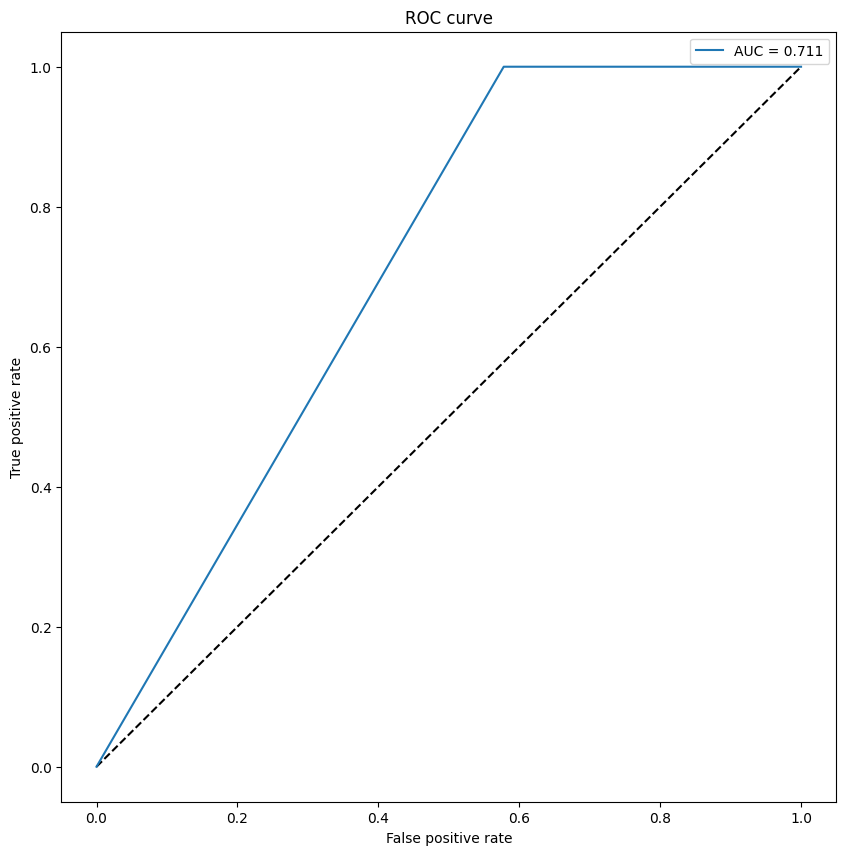

In [152]:
# ROC

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_conv = torch.argmax(y_pred, dim=1)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred_conv.ravel())
    # fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

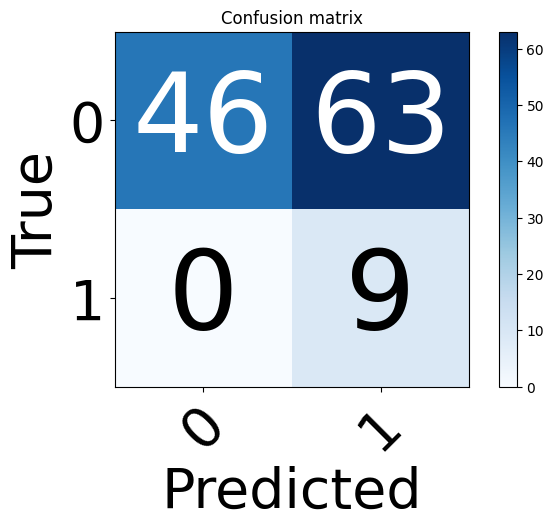

Recall (Sensitivity) =  1.00
Specificity =     0.42
Accuracy =     0.47
Precision(PPV) =     0.12
NPV =     1.00


In [153]:
cm = confusion_matrix(y_test, y_pred_conv)
plot_confusion_matrix(cm, ['0', '1'], )

In [154]:
''' 
Fig. 5D: MLP ac/bc model with BCE loss function

'''

' \nFig. 5D: MLP ac/bc model with BCE loss function\n\n'

In [155]:
YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig5d/yolodetect_new2test_save_dir"
test_df = test_df = prepare_RL_acbc2_df_point(YOLOIMG_FILE_DIR)
test_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,rbcp1,rbcp2,...,lp5,lp6,lp7,lbcp1,lbcp2,lbcp3,lbcp4,lbcp5,lbcp6,label
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_PTA33_0_1,101.0,102.0,101.0,89.0,152.0,162.0,157.0,213.0,100.0,89.0,...,230.0,244.0,265.0,143.0,156.0,208.0,235.0,215.0,215.0,1.0
1_PTA23_0_1,136.0,111.0,98.0,86.0,87.0,74.0,74.0,84.0,0.0,0.0,...,226.0,213.0,190.0,103.0,133.0,86.0,185.0,204.0,197.0,1.0
0_ntnshl_73,115.0,102.0,112.0,104.0,136.0,129.0,124.0,133.0,0.0,106.0,...,126.0,120.0,110.0,215.0,177.0,118.0,103.0,113.0,116.0,0.0
1_PTA83_0_1,125.0,115.0,127.0,90.0,77.0,77.0,77.0,77.0,0.0,0.0,...,347.0,342.0,320.0,207.0,231.0,244.0,244.0,232.0,226.0,1.0
0_ntnshl_63,276.0,264.0,225.0,239.0,340.0,386.0,394.0,381.0,0.0,177.0,...,394.0,394.0,381.0,232.0,260.0,260.0,274.0,277.0,249.0,0.0
1_PTA53_1_0,144.0,131.0,105.0,106.0,120.0,144.0,155.0,134.0,118.0,107.0,...,120.0,132.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0_ntnshl_13,171.0,171.0,160.0,158.0,133.0,119.0,115.0,142.0,0.0,142.0,...,124.0,115.0,124.0,140.0,129.0,129.0,129.0,101.0,97.0,0.0
1_PTA43_0_1,93.0,87.0,85.0,85.0,85.0,76.0,85.0,85.0,0.0,0.0,...,348.0,344.0,321.0,119.0,156.0,244.0,243.0,231.0,225.0,1.0
0_ntnshl_33,140.0,116.0,129.0,106.0,100.0,109.0,126.0,182.0,0.0,0.0,...,142.0,165.0,204.0,228.0,203.0,136.0,104.0,124.0,138.0,0.0


In [156]:
X_test = test_df.loc[:, :'lbcp6']
y_test = test_df.loc[:, 'label'].astype(int).values

In [157]:
from sklearn.preprocessing import StandardScaler
import joblib
# Load the scaler
scaler_loaded = joblib.load('../data/models/anlaysis/scaler_fig5d.pkl')
# transform data
X_test = scaler_loaded.transform(X_test)
X_test

/Users/tesutoyoukanrisha/python_envs/codeocean_audiogram1_env/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[ 1.14268569e-16,  8.24551603e-17,  9.86864911e-17,
        -7.79103877e-18,  1.37641685e-16,  1.15567075e-16,
        -6.75223360e-17,  8.82984394e-17, -2.20746098e-17,
        -2.33731163e-17,  5.58357778e-17, -2.20746098e-17,
         2.59701292e-17,  6.23283102e-17,  1.24656620e-16,
         4.15522068e-17,  1.14268569e-16,  1.66208827e-16,
         5.19402585e-17,  1.66208827e-16, -1.66208827e-16,
         4.15522068e-17, -5.19402585e-18, -1.03880517e-16,
         2.07761034e-17, -4.67462326e-17,  2.07761034e-17,
         3.11641551e-17],
       [ 1.01000000e+02,  1.02000000e+02,  1.01000000e+02,
         8.90000000e+01,  1.52000000e+02,  1.62000000e+02,
         1.57000000e+02,  2.13000000e+02,  1.00000000e+02,
         8.90000000e+01,  8.70000000e+01,  1.23000000e+02,
         1.59000000e+02,  1.51000000e+02,  1.27000000e+02,
         1.38000000e+02,  1.63000000e+02,  2.28000000e+02,
         2.52000000e+02,  2.30000000e+02,  2.44000000e+02,
         2.65000000e+02,  1.43

In [158]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 2)#number of classes: original:3 for iris classification

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [159]:
import torch.optim as optim
model = Model(X_test.shape[1])
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
loss_fn = nn.BCEWithLogitsLoss()
model

Model(
  (layer1): Linear(in_features=28, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=2, bias=True)
)

In [160]:
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [161]:
model.load_state_dict(torch.load('../data/models/anlaysis/fig5d_MLP_acbc_BCE.pt'))

<All keys matched successfully>

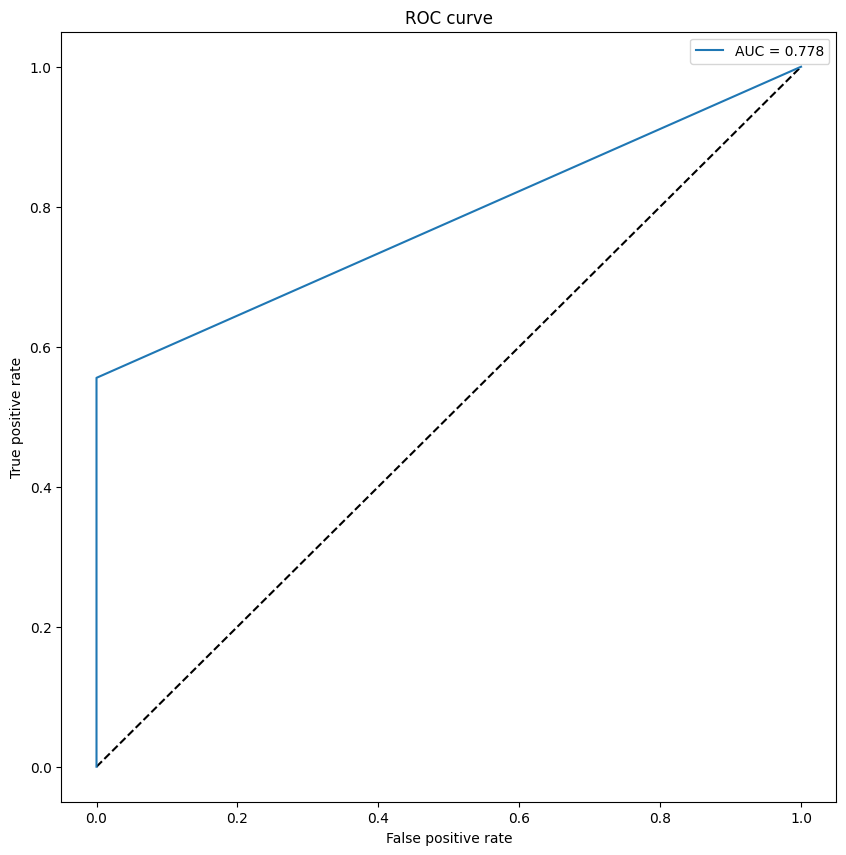

In [162]:
# ROC

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_conv = torch.argmax(y_pred, dim=1)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred_conv.ravel())
    # fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

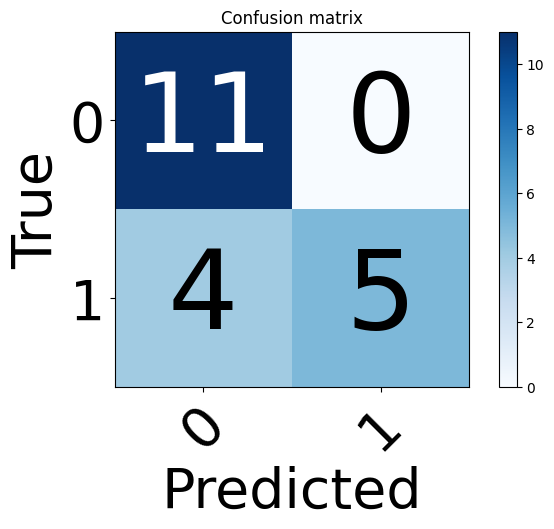

Recall (Sensitivity) =  0.56
Specificity =     1.00
Accuracy =     0.80
Precision(PPV) =     1.00
NPV =     0.73


In [163]:
cm = confusion_matrix(y_test, y_pred_conv)
plot_confusion_matrix(cm, ['0', '1'], )

In [164]:
''' 
Fig. 5E: MLP ac/bc model with BCE loss function in a biased test dataset

'''

' \nFig. 5E: MLP ac/bc model with BCE loss function in a biased test dataset\n\n'

In [165]:
#To prepare training data
from utilities.df_preps.fig5a_acbc_df_prep import prepare_RL_acbc2_df_point

YOLOIMG_FILE_DIR = "../data/datasets/YOLOresults/fig5e/yolodetect_new2testadded77_save_dir"
test_df = prepare_RL_acbc2_df_point(YOLOIMG_FILE_DIR)
test_df

,rp0,rp1,rp2,rp3,rp4,rp5,rp6,rp7,rbcp1,rbcp2,...,lp5,lp6,lp7,lbcp1,lbcp2,lbcp3,lbcp4,lbcp5,lbcp6,label
initial_cont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_PTA33_0_1,101.0,102.0,101.0,89.0,152.0,162.0,157.0,213.0,100.0,89.0,...,230.0,244.0,265.0,143.0,156.0,208.0,235.0,215.0,215.0,1.0
1_PTA23_0_1,136.0,111.0,98.0,86.0,87.0,74.0,74.0,84.0,0.0,0.0,...,226.0,213.0,190.0,103.0,133.0,86.0,185.0,204.0,197.0,1.0
0_NT28_0_0,152.0,151.0,126.0,88.0,166.0,188.0,231.0,236.0,138.0,129.0,...,249.0,262.0,253.0,207.0,230.0,232.0,243.0,226.0,220.0,0.0
0_NT38_0_0,113.0,98.0,206.0,215.0,215.0,202.0,201.0,224.0,89.0,179.0,...,62.0,62.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_NT60_0_0,120.0,126.0,102.0,75.0,74.0,87.0,88.0,111.0,0.0,0.0,...,151.0,192.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_NT70_0_0,92.0,99.0,88.0,87.0,124.0,147.0,119.0,77.0,0.0,87.0,...,97.0,86.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_NT02_0_0,149.0,137.0,137.0,123.0,111.0,100.0,110.0,98.0,137.0,148.0,...,87.0,97.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0_NT12_0_0,214.0,214.0,200.0,214.0,213.0,200.0,205.0,259.0,176.0,196.0,...,215.0,218.0,260.0,176.0,217.0,236.0,210.0,200.0,200.0,0.0


In [166]:
X_test = test_df.loc[:, :'lbcp6']
y_test = test_df.loc[:, 'label'].astype(int).values

In [167]:
# Load the scaler
scaler_loaded = joblib.load('../data/models/anlaysis/scaler_fig5d.pkl')

# Use the loaded scaler to transform data (if needed)
X_test = scaler_loaded.transform(X_test)

/Users/tesutoyoukanrisha/python_envs/codeocean_audiogram1_env/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [168]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 2)#number of classes: original:3 for iris classification

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [169]:
model = Model(X_test.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCEWithLogitsLoss()
model

Model(
  (layer1): Linear(in_features=28, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=2, bias=True)
)

In [170]:
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()

In [171]:
model.load_state_dict(torch.load('../data/models/anlaysis/fig5d_MLP_acbc_BCE.pt'))

<All keys matched successfully>

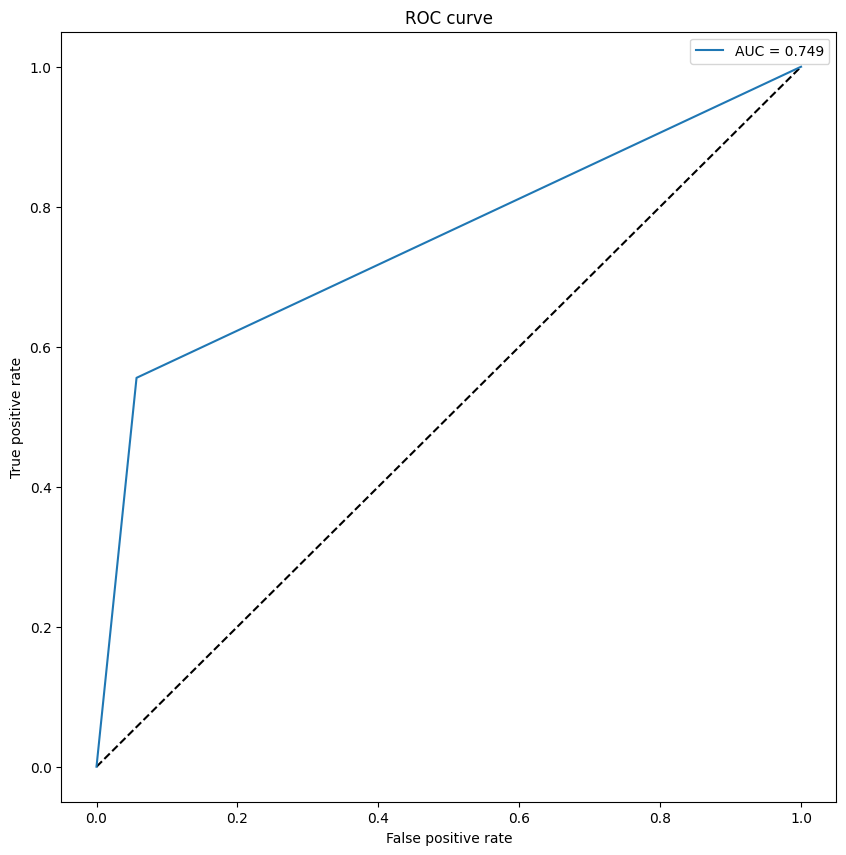

In [172]:
# ROC

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_conv = torch.argmax(y_pred, dim=1)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred_conv.ravel())
    # fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

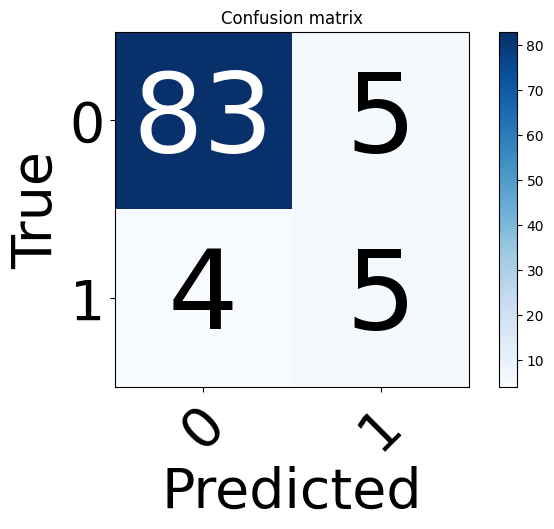

Recall (Sensitivity) =  0.56
Specificity =     0.94
Accuracy =     0.91
Precision(PPV) =     0.50
NPV =     0.95


In [173]:
cm = confusion_matrix(y_test, y_pred_conv)
plot_confusion_matrix(cm, ['0', '1'], )